In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import plotly.express as px
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import math
from sklearn.model_selection import cross_val_score, cross_val_predict

In [2]:
aire_sin = pd.read_csv("../CSV_limpios/aire.csv")
crimen_sin = pd.read_csv("../CSV_limpios/crimen.csv")

aire_all = pd.read_csv("../CSV_limpios/aire_v2.csv")
crimen_all = pd.read_csv("../CSV_limpios/crimen_v2.csv")

crimen_o3 = pd.read_csv("../CSV_limpios/crimen_for_plots.csv")
aire_o3 = pd.read_csv("../CSV_limpios/aire_for_plots.csv")

df_std = pd.read_csv('../CSV_limpios/crime_air_std.csv')

In [3]:
df_std = df_std.drop(df_std.columns[[0, -1, -2]], axis=1)

In [4]:
df_std = df_std[['ID', 'Dia', 'Mes', 'Anio', 'Latitud', 'Longitud', 'Alcaldia', 'Alcaldia_num', 'AQI', 'Crimenes']]

In [5]:
df_std

ID  Dia  Mes  Anio    Latitud   Longitud  \
0        1_1_2016_BENIT    1    1  2016  19.370464 -99.159599   
1        1_1_2016_CUAJI    1    1  2016  19.365313 -99.291702   
2        1_1_2016_CUAUH    1    1  2016  19.411617 -99.152206   
3        1_1_2016_IZTAC    1    1  2016  19.384413 -99.117638   
4        1_1_2016_MIGUE    1    1  2016  19.404051 -99.202660   
...                 ...  ...  ...   ...        ...        ...   
14724  31_12_2020_BENIT   31   12  2020  19.370464 -99.159599   
14725  31_12_2020_CUAJI   31   12  2020  19.357357 -99.262863   
14726  31_12_2020_GUSTA   31   12  2020  19.482700 -99.094521   
14727  31_12_2020_IZTAP   31   12  2020  19.360794 -99.073883   
14728  31_12_2020_VENUS   31   12  2020  19.424610 -99.119591   

                    Alcaldia  Alcaldia_num  AQI  Crimenes  
0              BENITO JUAREZ             1  184         7  
1      CUAJIMALPA DE MORELOS             5  164        10  
2                 CUAUHTEMOC             8  178        12  
3                  IZTACALCO             3  187        12  
4             MIGUEL HIDALGO             9  180         6  
...                      ...           ...  ...       ...  
14724          BENITO JUAREZ             1  117         2  
14725  CUAJIMALPA DE MORELOS             5   97         2  
14726       GUSTAVO A MADERO            12  128        24  
14727             IZTAPALAPA            10  127        15  
14728    VENUSTIANO CARRANZA             2  127        14  

[14729 rows x 10 columns]

In [11]:
df_train, df_test = train_test_split(df_std, test_size=0.2)

In [69]:
X_train = df_train.drop(df_train.columns[[0, 4, 5, 6, -1]], axis=1).values
y_train = df_train["Crimenes"].values #target

In [8]:
model = LinearRegression()

In [9]:
model.fit(X_train, y_train)

LinearRegression()

In [70]:
X_test = df_test.drop(df_test.columns[[0, 1, 2, 3, 4, 5, 6, -1]], axis=1).values
y_test = df_test["Crimenes"].values #target

In [12]:
model.score(X_test, y_test)

0.12134423283373352

In [85]:
model.predict([[1, 100]])

array([9.4863321])

0.058102001291155586


<AxesSubplot:xlabel='AQI', ylabel='Crimenes'>

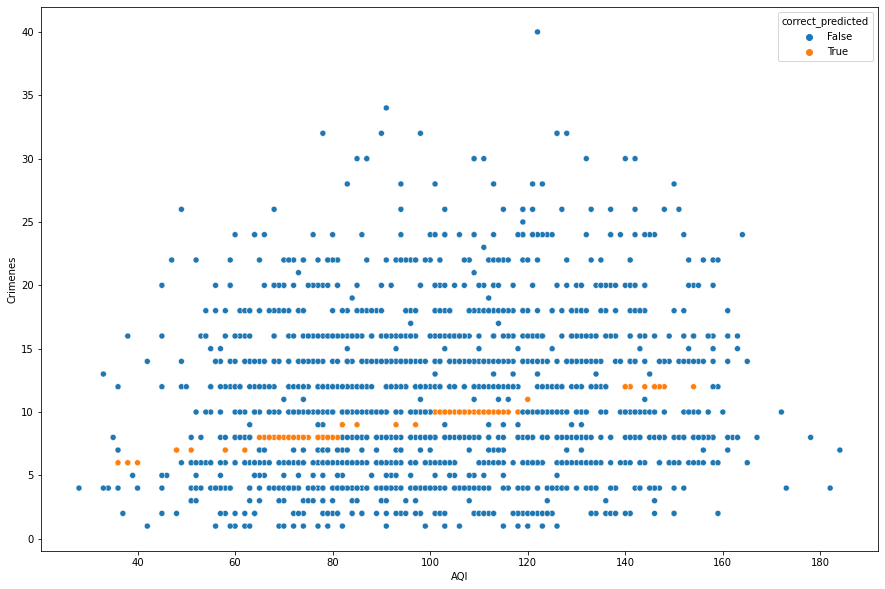

In [13]:
df_plot = df_std[(df_std['Alcaldia'] == "BENITO JUAREZ")].copy()

X_plot = df_plot.drop(df_plot.columns[[0, 1, 2, 3, 4, 5, 6, -1]], axis=1).values
y_plot = df_plot["Crimenes"].values #target

y_pred = model.predict(X_plot)
y_pred = np.around(y_pred)
correct_predicted = y_pred == y_plot
accuracy = np.mean(correct_predicted)
df_plot['correct_predicted'] = correct_predicted
df_plot['predicted'] = y_pred
print(accuracy)

plt.figure(figsize=(15, 10))
sns.scatterplot(x="AQI", y="Crimenes", hue="correct_predicted", data=df_plot)

# Logistic Regression

In [6]:
categories = [i+1 for i in range(0, math.ceil(df_std["Crimenes"].max()+4), 5)]

labels = ["{0} - {1}".format(i, i+4) for i in range(1, math.ceil(df_std["Crimenes"].max()), 5)]
labels2 = list(range(1, len(labels)+1))
print(labels)
print(categories)
labels2

['1 - 5', '6 - 10', '11 - 15', '16 - 20', '21 - 25', '26 - 30', '31 - 35', '36 - 40', '41 - 45', '46 - 50', '51 - 55', '56 - 60']
[1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [7]:
df_std1 = df_std.copy()
df_std1["Crime_cat"] = pd.cut(df_std1['Crimenes'], bins=categories, right=False, labels=labels)
df_std1["Crime_cat_num"] = pd.cut(df_std1['Crimenes'], bins=categories, right=False, labels=labels2)

In [8]:
df_std1

ID  Dia  Mes  Anio    Latitud   Longitud  \
0        1_1_2016_BENIT    1    1  2016  19.370464 -99.159599   
1        1_1_2016_CUAJI    1    1  2016  19.365313 -99.291702   
2        1_1_2016_CUAUH    1    1  2016  19.411617 -99.152206   
3        1_1_2016_IZTAC    1    1  2016  19.384413 -99.117638   
4        1_1_2016_MIGUE    1    1  2016  19.404051 -99.202660   
...                 ...  ...  ...   ...        ...        ...   
14724  31_12_2020_BENIT   31   12  2020  19.370464 -99.159599   
14725  31_12_2020_CUAJI   31   12  2020  19.357357 -99.262863   
14726  31_12_2020_GUSTA   31   12  2020  19.482700 -99.094521   
14727  31_12_2020_IZTAP   31   12  2020  19.360794 -99.073883   
14728  31_12_2020_VENUS   31   12  2020  19.424610 -99.119591   

                    Alcaldia  Alcaldia_num  AQI  Crimenes Crime_cat  \
0              BENITO JUAREZ             1  184         7    6 - 10   
1      CUAJIMALPA DE MORELOS             5  164        10    6 - 10   
2                 CUAUHTEMOC             8  178        12   11 - 15   
3                  IZTACALCO             3  187        12   11 - 15   
4             MIGUEL HIDALGO             9  180         6    6 - 10   
...                      ...           ...  ...       ...       ...   
14724          BENITO JUAREZ             1  117         2     1 - 5   
14725  CUAJIMALPA DE MORELOS             5   97         2     1 - 5   
14726       GUSTAVO A MADERO            12  128        24   21 - 25   
14727             IZTAPALAPA            10  127        15   11 - 15   
14728    VENUSTIANO CARRANZA             2  127        14   11 - 15   

      Crime_cat_num  
0                 2  
1                 2  
2                 3  
3                 3  
4                 2  
...             ...  
14724             1  
14725             1  
14726             5  
14727             3  
14728             3  

[14729 rows x 12 columns]

In [8]:
df_train, df_test = train_test_split(df_std1, test_size=0.2)
X_train = df_train.drop(df_train.columns[[0, 1, 2, 3, 4, 5, 6, -1, -2, -3]], axis=1).values
y_train = df_train["Crime_cat_num"].values #target

In [25]:
model = LogisticRegression(max_iter=5000, C=0.1)
accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
print(f"Accuracy: {np.mean(accuracies) * 100:.2f}%")

Accuracy: 25.28%


In [40]:
X_test = df_test.drop(df_test.columns[[0, 1, 2, 3, 4, 5, 6, -1, -2, -3]], axis=1).values
y_test = df_test["Crime_cat_num"].values #target

In [27]:
model.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=5000)

In [28]:
y_test_pred = model.predict(X_test)

In [29]:
y_test_pred

array([1, 2, 2, ..., 8, 2, 2], dtype=int64)

In [30]:
test_set_correctly_classified = y_test_pred == y_test
test_set_accuracy = np.mean(test_set_correctly_classified)

In [31]:
print(f"Test set accuracy: {test_set_accuracy * 100:.2f}")

Test set accuracy: 24.71


In [32]:
df_predictions_test = df_test.copy()
df_predictions_test["correct_predict"] = test_set_correctly_classified
df_predictions_test["predictions"] = y_test_pred 
df_predictions_test["prediction_label"] = df_predictions_test["predictions"].map({1:"1 - 5", 2:"6 - 10", 3:"11 - 15", 4:"16 - 20", 5:"21 - 25", 6:"26 - 30", 7:"31 - 35", 8:"36 - 40", 9:"41 - 45", 10:"46 - 50", 11:"51 - 55", 12:"56 - 60"})

<AxesSubplot:xlabel='AQI', ylabel='Crimenes'>

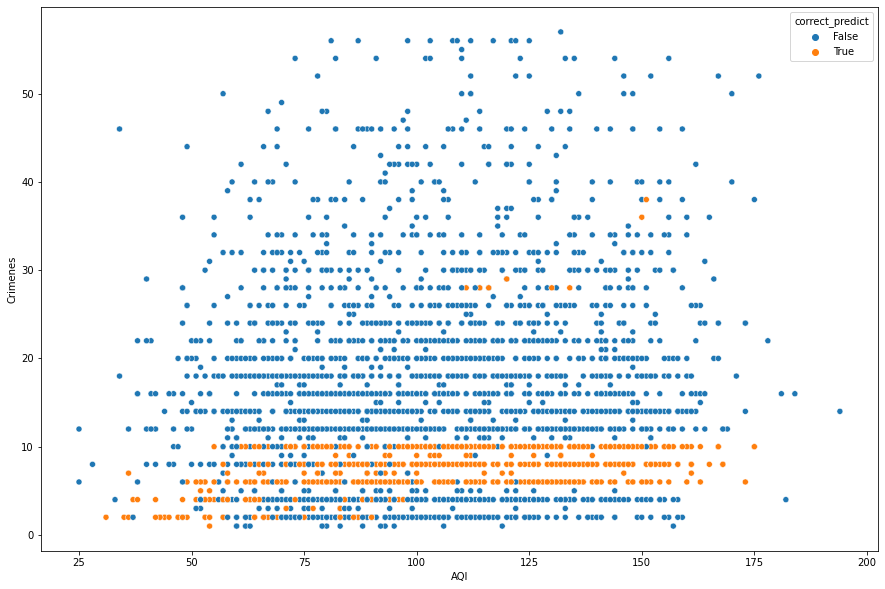

In [34]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x="AQI", y="Crimenes", hue="correct_predict", data=df_predictions_test)

0.33892834086507423


<AxesSubplot:xlabel='AQI', ylabel='Crimenes'>

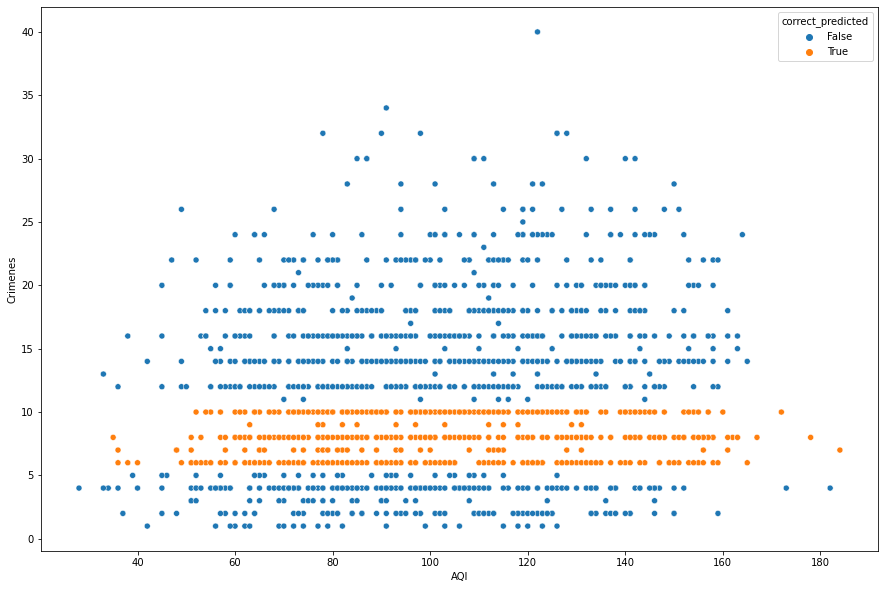

In [35]:
df_plot = df_std[(df_std['Alcaldia'] == "BENITO JUAREZ")].copy()

X_plot = df_plot.drop(df_plot.columns[[0, 1, 2, 3, 4, 5, 6, -1, -2, -3]], axis=1).values
y_plot = df_plot["Crime_cat_num"].values #target

y_pred = model.predict(X_plot)
correct_predicted = y_pred == y_plot
accuracy = np.mean(correct_predicted)
df_plot['correct_predicted'] = correct_predicted
df_plot['predicted'] = y_pred
print(accuracy)

plt.figure(figsize=(15, 10))
sns.scatterplot(x="AQI", y="Crimenes", hue="correct_predicted", data=df_plot)

0.2524271844660194


<AxesSubplot:xlabel='AQI', ylabel='Crimenes'>

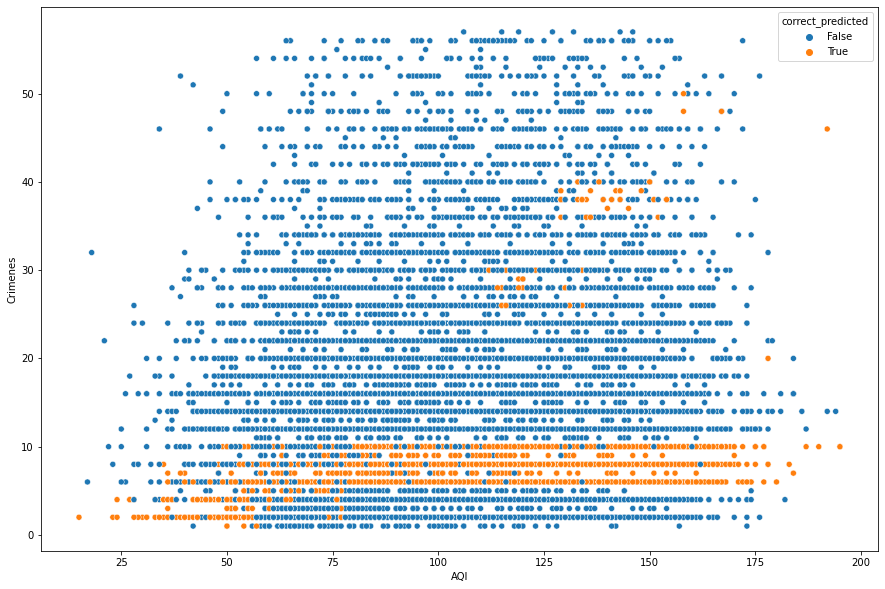

In [36]:
df_predict = df_std.copy()
X_plot = df_predict.drop(df_predict.columns[[0, 1, 2, 3, 4, 5, 6, -1, -2, -3]], axis=1).values
y_plot = df_predict["Crime_cat_num"].values #target

y_pred = model.predict(X_plot)
correct_predicted = y_pred == y_plot
accuracy = np.mean(correct_predicted)
df_predict['correct_predicted'] = correct_predicted
df_predict['predicted'] = y_pred
print(accuracy)

plt.figure(figsize=(15, 10))
sns.scatterplot(x="AQI", y="Crimenes", hue="correct_predicted", data=df_predict)

# Linear with crustering

In [41]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.12433076610824301

In [43]:
model.predict([[1, 70]])

array([2.00390301])

0.30277598450613297


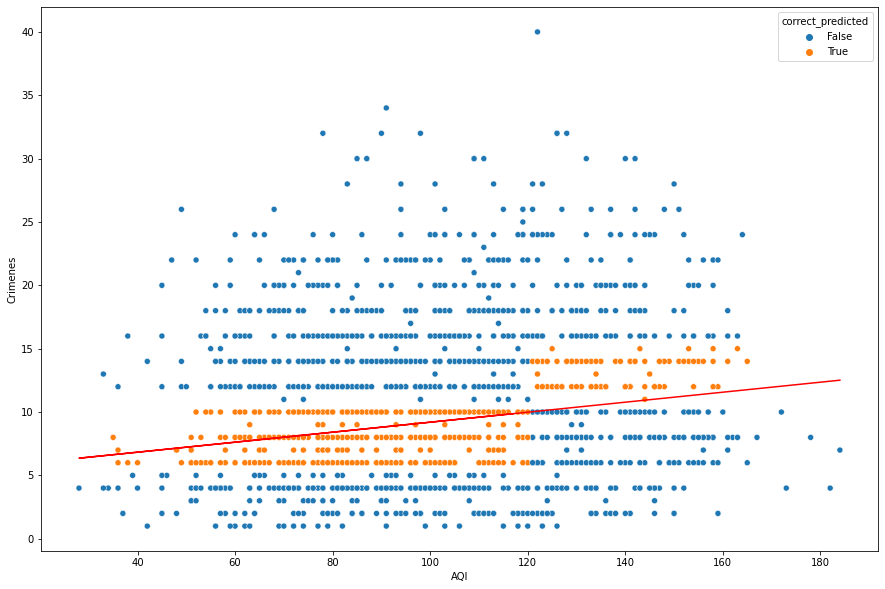

In [45]:
from sklearn.metrics import mean_squared_error, r2_score
 
df_plot = df_std1[(df_std1['Alcaldia'] == "BENITO JUAREZ")].copy()

X_plot = df_plot.drop(df_plot.columns[[0, 1, 2, 3, 4, 5, 6, -1, -2, -3]], axis=1).values
y_plot = df_plot["Crime_cat_num"].values #target

y_pred = model.predict(X_plot)
y_pred_round = np.around(y_pred)
correct_predicted = y_pred_round == y_plot
accuracy = np.mean(correct_predicted)
df_plot['correct_predicted'] = correct_predicted
df_plot['predicted'] = y_pred_round

print(accuracy)

plt.figure(figsize=(15, 10))
sns.scatterplot(x="AQI", y="Crimenes", hue="correct_predicted", data=df_plot)

plt.plot(df_plot['AQI'], y_pred*4, 'r')
plt.show()

0.2586094866796621


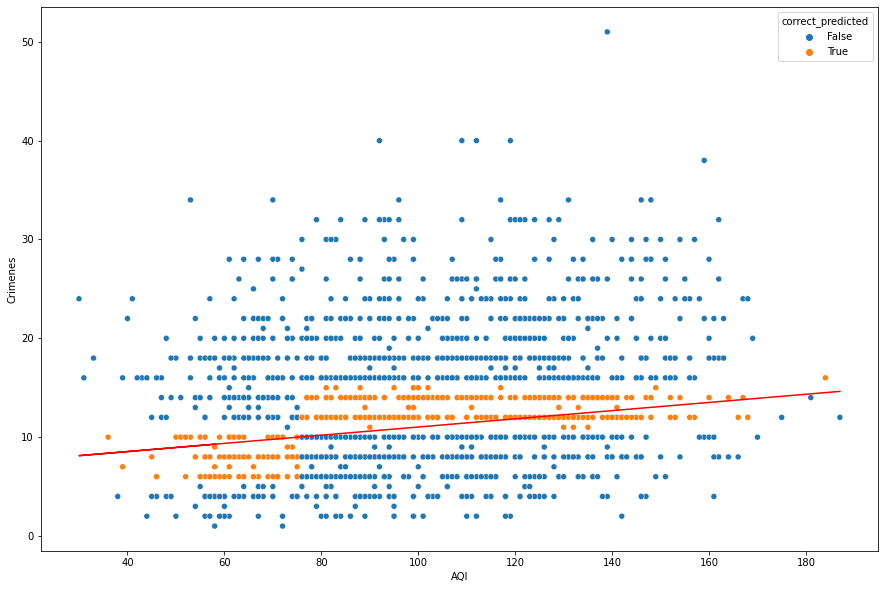

In [91]:
df_plot = df_std[(df_std['Alcaldia'] == "IZTACALCO")].copy()

X_plot = df_plot.drop(df_plot.columns[[0, 1, 2, 3, 4, 5, 6, -1, -2, -3]], axis=1).values
y_plot = df_plot["Crime_cat_num"].values #target

y_pred = model.predict(X_plot)
y_pred_round = np.around(y_pred)
correct_predicted = y_pred_round == y_plot
accuracy = np.mean(correct_predicted)
df_plot['correct_predicted'] = correct_predicted
df_plot['predicted'] = y_pred_round

print(accuracy)

plt.figure(figsize=(15, 10))
sns.scatterplot(x="AQI", y="Crimenes", hue="correct_predicted", data=df_plot)

plt.plot(df_plot['AQI'], y_pred*4, 'r')
plt.show()

0.08064516129032258


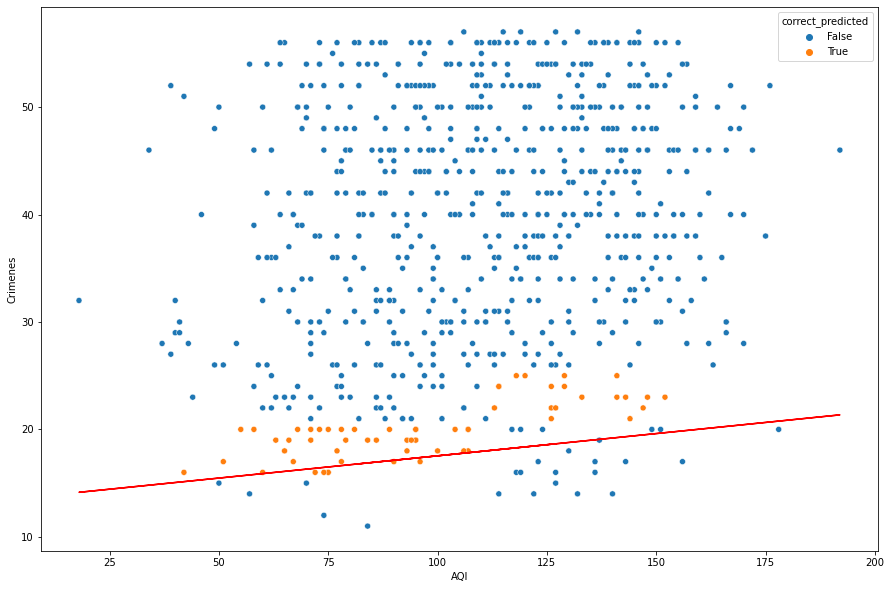

In [92]:
df_plot = df_std[(df_std['Alcaldia'] == "IZTAPALAPA")].copy()

X_plot = df_plot.drop(df_plot.columns[[0, 1, 2, 3, 4, 5, 6, -1, -2, -3]], axis=1).values
y_plot = df_plot["Crime_cat_num"].values #target

y_pred = model.predict(X_plot)
y_pred_round = np.around(y_pred)
correct_predicted = y_pred_round == y_plot
accuracy = np.mean(correct_predicted)
df_plot['correct_predicted'] = correct_predicted
df_plot['predicted'] = y_pred_round

print(accuracy)

plt.figure(figsize=(15, 10))
sns.scatterplot(x="AQI", y="Crimenes", hue="correct_predicted", data=df_plot)

plt.plot(df_plot['AQI'], y_pred*4, 'r')
plt.show()

0.19721577726218098


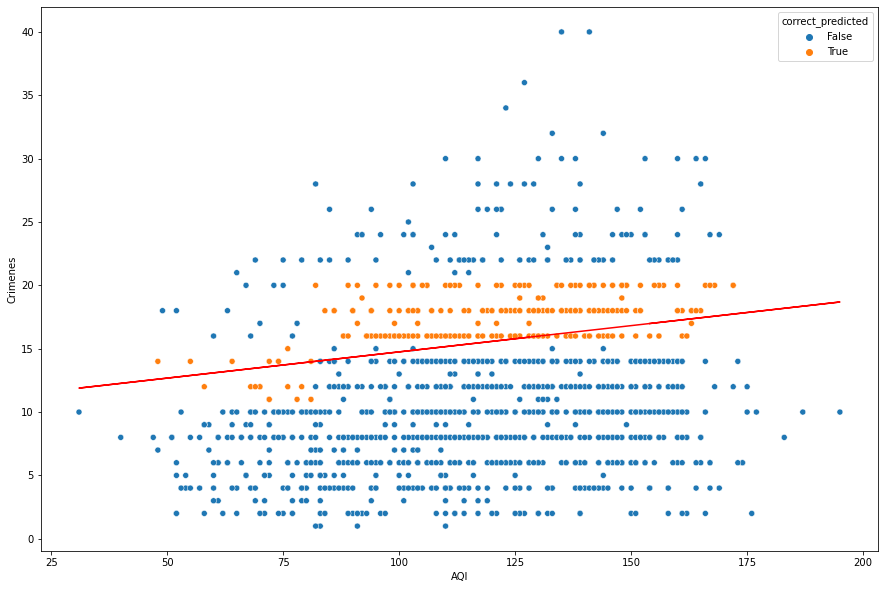

In [93]:
df_plot = df_std[(df_std['Alcaldia'] == "AZCAPOTZALCO")].copy()

X_plot = df_plot.drop(df_plot.columns[[0, 1, 2, 3, 4, 5, 6, -1, -2, -3]], axis=1).values
y_plot = df_plot["Crime_cat_num"].values #target

y_pred = model.predict(X_plot)
y_pred_round = np.around(y_pred)
correct_predicted = y_pred_round == y_plot
accuracy = np.mean(correct_predicted)
df_plot['correct_predicted'] = correct_predicted
df_plot['predicted'] = y_pred_round

print(accuracy)

plt.figure(figsize=(15, 10))
sns.scatterplot(x="AQI", y="Crimenes", hue="correct_predicted", data=df_plot)

plt.plot(df_plot['AQI'], y_pred*4, 'r')
plt.show()

0.18405865978681513


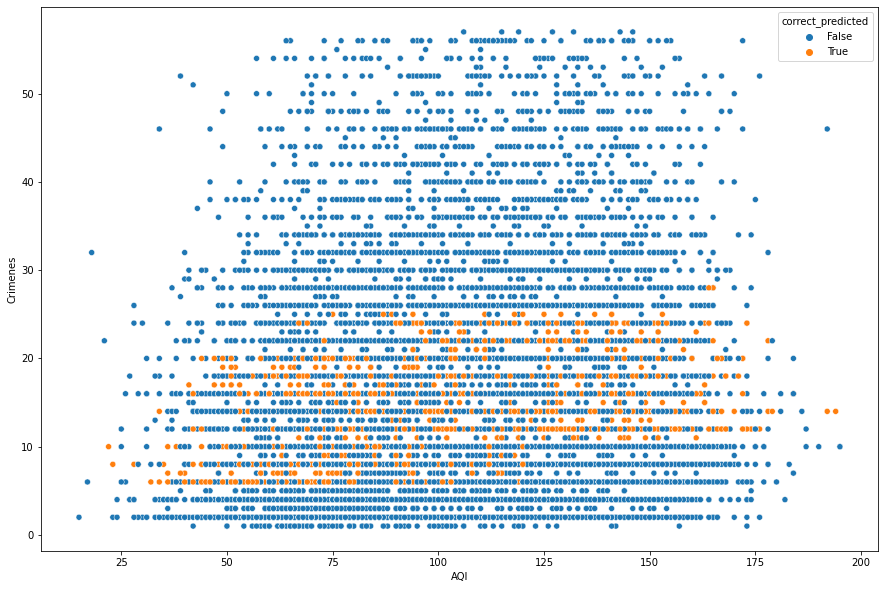

In [94]:
df_predict = df_std.copy()
X_plot = df_predict.drop(df_predict.columns[[0, 1, 2, 3, 4, 5, 6, -1, -2, -3]], axis=1).values
y_plot = df_predict["Crime_cat_num"].values #target

y_pred = model.predict(X_plot)
y_pred_round = np.around(y_pred)
correct_predicted = y_pred_round == y_plot
accuracy = np.mean(correct_predicted)
df_predict['correct_predicted'] = correct_predicted
df_predict['predicted'] = y_pred_round
print(accuracy)

plt.figure(figsize=(15, 10))
sns.scatterplot(x="AQI", y="Crimenes", hue="correct_predicted", data=df_predict)

#plt.plot(df_predict['AQI'], y_pred*4, 'r')
plt.show()

In [53]:
df_benito_juarez = df_std[(df_std['Alcaldia'] == "BENITO JUAREZ")].copy()

df_train, df_test = train_test_split(df_benito_juarez, test_size=0.2)

X_train = df_train.drop(df_train.columns[[0, 1, 2, 3, 4, 5, 6, 7, -1, -2, -3]], axis=1).values
y_train = df_train["Crimenes"].values #target

model = LinearRegression()
model.fit(X_train, y_train)

X_test = df_test.drop(df_test.columns[[0, 1, 2, 3, 4, 5, 6, 7, -1, -2, -3]], axis=1).values
y_test = df_test["Crimenes"].values #target

model.score(X_test, y_test)

-0.05378404192391306

0.04389928986442866


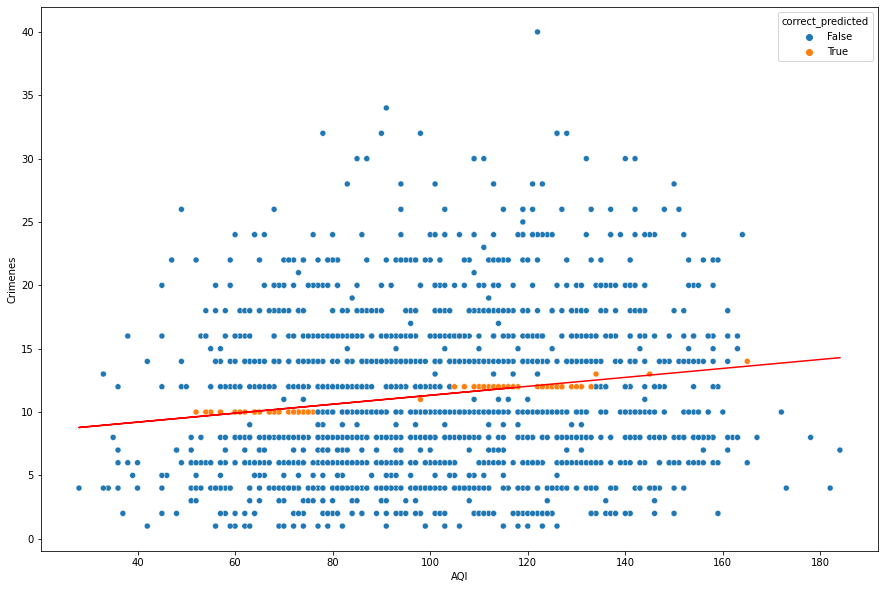

In [65]:
df_plot = df_std[(df_std['Alcaldia'] == "BENITO JUAREZ")].copy()

X_plot = df_plot.drop(df_plot.columns[[0, 1, 2, 3, 4, 5, 6, 7, -1, -2, -3]], axis=1).values
y_plot = df_plot["Crimenes"].values #target

y_pred = model.predict(X_plot)
y_pred_round = np.around(y_pred).astype(int)
correct_predicted = y_pred_round == y_plot
accuracy = np.mean(correct_predicted)
df_plot['correct_predicted'] = correct_predicted
df_plot['predicted'] = y_pred_round

print(accuracy)

plt.figure(figsize=(15, 10))
sns.scatterplot(x="AQI", y="Crimenes", hue="correct_predicted", data=df_plot)

plt.plot(df_plot['AQI'], y_pred, 'r')
plt.show()

# Tomando sólo la Alcaldia 

In [105]:
df_std2 = df_std1[df_std1["Alcaldia"] == "BENITO JUAREZ"]

In [111]:
df_train, df_test = train_test_split(df_std2, test_size=0.2)
X_train = df_train.drop(df_train.columns[[0, 4, 5, 6, 7, -1, -2, -3]], axis=1).values
y_train = df_train["Crime_cat_num"].values #target

In [112]:
X_test = df_test.drop(df_test.columns[[0, 4, 5, 6, 7, -1, -2, -3]], axis=1).values
y_test = df_test["Crime_cat_num"].values #target

In [113]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

0.24273724983860556


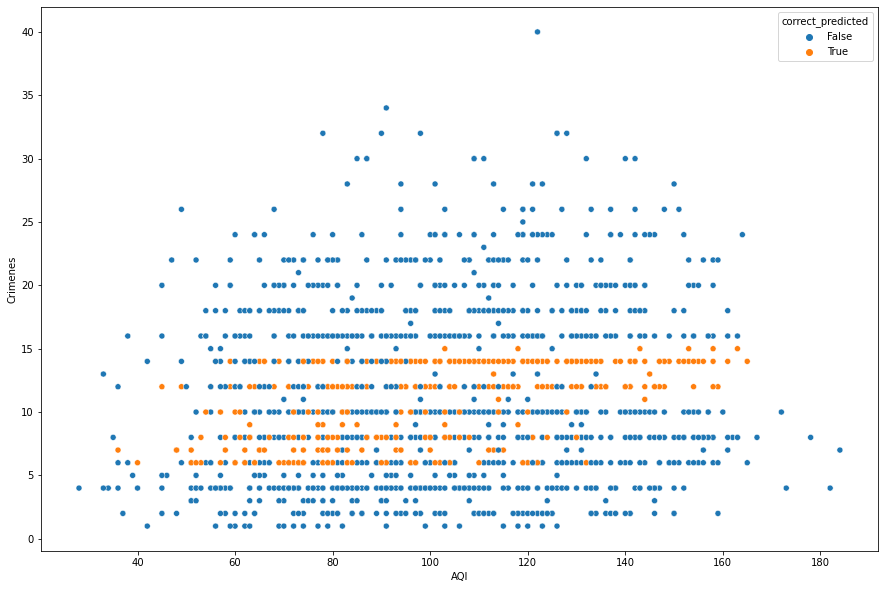

In [115]:
df_plot = df_std2.copy()

X_plot = df_plot.drop(df_plot.columns[[0, 4, 5, 6, 7, -1, -2, -3]], axis=1).values
y_plot = df_plot["Crime_cat_num"].values #target

y_pred = model.predict(X_plot)
y_pred_round = np.around(y_pred)
correct_predicted = y_pred_round == y_plot
accuracy = np.mean(correct_predicted)
df_plot['correct_predicted'] = correct_predicted
df_plot['predicted'] = y_pred_round

print(accuracy)

plt.figure(figsize=(15, 10))
sns.scatterplot(x="AQI", y="Crimenes", hue="correct_predicted", data=df_plot)

#plt.plot(df_plot['AQI'], y_pred*4, 'r')
plt.show()

In [94]:
print(f"f(x_1,x_2,x_3,x_4,x_5 ) = {model.intercept_} + {model.coef_[0]} x_1 + {model.coef_[1]} x_2 + { model.coef_[2]} x_3 + { model.coef_[3]} x_4 + {model.coef_[4]} x_5")

f(x_1,x_2,x_3,x_4,x_5 ) = -434.94668804923185 + -0.0011034716750331394 x_1 + -0.006883775642043025 x_2 + 0.21610894997190278 x_3 + 0.21941211899603583 x_4 + 0.010491503325830667 x_5


In [86]:
def get_alc_1_prediction(x, model):
    prediction = model.intercept_
    for i in range(len(model.coef_)):
        prediction = prediction + model.coef_[i]*x[i]
    return prediction

In [119]:
get_alc_1_prediction([27, 11, 2022, 70], model)

2.163893100322214

In [118]:
model.predict([[27, 11, 2022, 70]])

array([2.1638931])

# Mes, Anio

In [120]:
df_train, df_test = train_test_split(df_std2, test_size=0.2)
X_train = df_train.drop(df_train.columns[[0, 1, 4, 5, 6, -1, -2, -3]], axis=1).values
y_train = df_train["Crime_cat_num"].values #target

In [121]:
X_test = df_test.drop(df_test.columns[[0, 1, 4, 5, 6, -1, -2, -3]], axis=1).values
y_test = df_test["Crime_cat_num"].values #target

In [124]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

0.24661071659134925


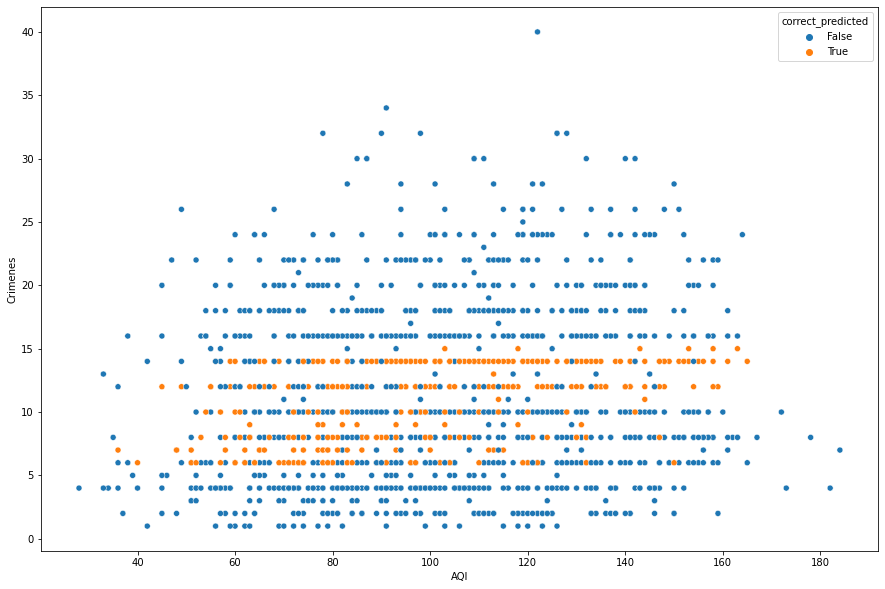

In [125]:
df_plot = df_std2.copy()

X_plot = df_plot.drop(df_plot.columns[[0, 1, 4, 5, 6, -1, -2, -3]], axis=1).values
y_plot = df_plot["Crime_cat_num"].values #target

y_pred = model.predict(X_plot)
y_pred_round = np.around(y_pred)
correct_predicted = y_pred_round == y_plot
accuracy = np.mean(correct_predicted)
df_plot['correct_predicted'] = correct_predicted
df_plot['predicted'] = y_pred_round

print(accuracy)

plt.figure(figsize=(15, 10))
sns.scatterplot(x="AQI", y="Crimenes", hue="correct_predicted", data=df_plot)

#plt.plot(df_plot['AQI'], y_pred*4, 'r')
plt.show()

In [126]:
model.predict([[11, 2022, 1, 70]])

array([2.19090528])

In [128]:
get_alc_1_prediction([11, 2022, 1, 70], model)

2.1909052833682843

# Anio

In [151]:
df_train, df_test = train_test_split(df_std2, test_size=0.2)
X_train = df_train.drop(df_train.columns[[0, 1, 2, 4, 5, 6, -1, -2, -3]], axis=1).values
y_train = df_train["Crime_cat_num"].values #target

In [152]:
X_test = df_test.drop(df_test.columns[[0, 1, 4, 5, 6, -1, -2, -3]], axis=1).values
y_test = df_test["Crime_cat_num"].values #target

In [153]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

0.24402840542285345


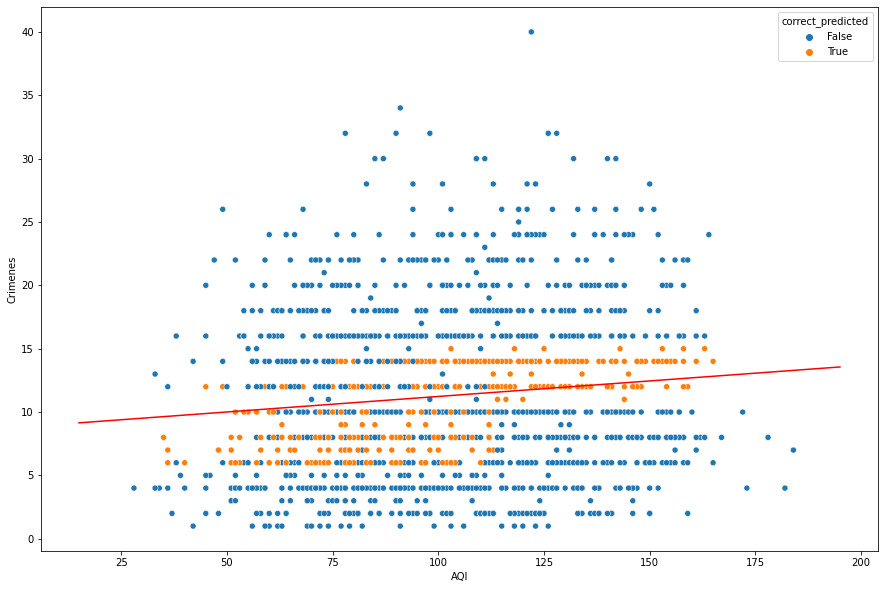

In [164]:
df_plot = df_std2.copy()

X_plot = df_plot.drop(df_plot.columns[[0, 1, 2, 4, 5, 6, -1, -2, -3]], axis=1).values
y_plot = df_plot["Crime_cat_num"].values #target

y_pred = model.predict(X_plot)
y_pred_round = np.around(y_pred)
correct_predicted = y_pred_round == y_plot
accuracy = np.mean(correct_predicted)
df_plot['correct_predicted'] = correct_predicted
df_plot['predicted'] = y_pred_round

print(accuracy)

plt.figure(figsize=(15, 10))
sns.scatterplot(x="AQI", y="Crimenes", hue="correct_predicted", data=df_plot)

plt.plot(aqi_range, crime_pred, 'r')
plt.show()

In [133]:
model.predict([[2022, 1, 70]])

array([2.10670809])

In [134]:
get_alc_1_prediction([2022, 1, 70], model)

2.1067080935949196

In [141]:
aqi_range = list(range(df_std1["AQI"].values.min(), df_std1["AQI"].values.max()+1, 1))

In [161]:
crime_pred = []
for a in aqi_range:
    crime_pred.append(get_alc_1_prediction([2022, 1, a], model) * 5 )

# Iztapalapa mes, anio

In [241]:
df_Iztapalapa = df_std1[df_std1["Alcaldia"] == "IZTAPALAPA"]

df_train, df_test = train_test_split(df_Iztapalapa, test_size=0.2)
X_train = df_train.drop(df_train.columns[[0, 1, 4, 5, 6, -1, -2, -3]], axis=1).values
y_train = df_train["Crime_cat_num"].values #target

In [242]:
X_test = df_test.drop(df_test.columns[[0, 1, 4, 5, 6, -1, -2, -3]], axis=1).values
y_test = df_test["Crime_cat_num"].values #target

In [243]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.06660831551450175

In [244]:
aqi_range = list(range(df_Iztapalapa["AQI"].values.min(), df_Iztapalapa["AQI"].values.max()+1, 1))
crime_pred = []
for a in aqi_range:
    crime_pred.append(get_alc_1_prediction([6, 2022, 1, a], model) * 5 )

Accuracy: 14.38%


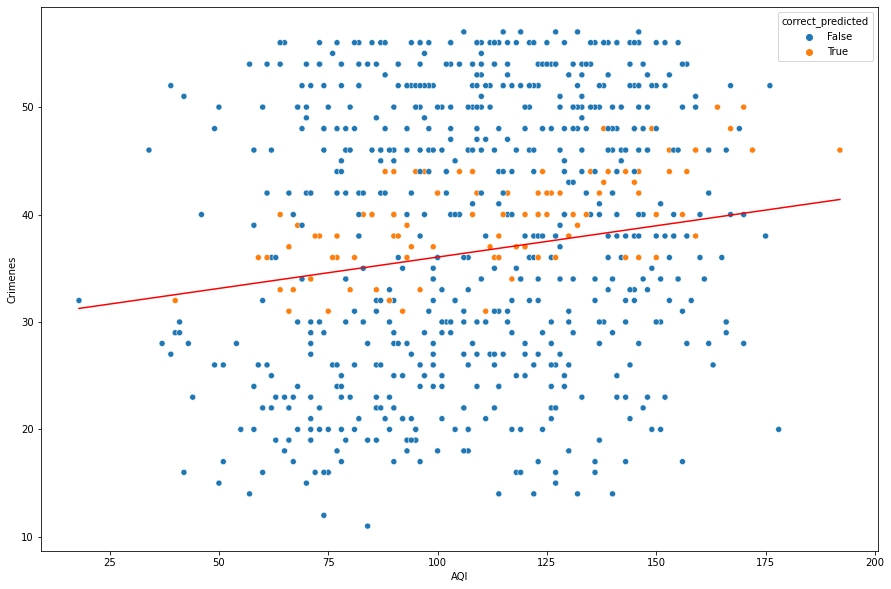

In [245]:
df_plot = df_Iztapalapa.copy()

X_plot = df_plot.drop(df_plot.columns[[0, 1, 4, 5, 6, -1, -2, -3]], axis=1).values
y_plot = df_plot["Crime_cat_num"].values #target

y_pred = model.predict(X_plot)
y_pred_round = np.around(y_pred)
correct_predicted = y_pred_round == y_plot
accuracy = np.mean(correct_predicted)
df_plot['correct_predicted'] = correct_predicted
df_plot['predicted'] = y_pred_round

print(f"Accuracy: {accuracy * 100:.2f}%")

plt.figure(figsize=(15, 10))
sns.scatterplot(x="AQI", y="Crimenes", hue="correct_predicted", data=df_plot)

plt.plot(aqi_range, crime_pred, 'r')
plt.show()

# GUSTAVO A MADERO mes, anio

In [394]:
df_Iztacalco = df_std1[df_std1["Alcaldia"] == "GUSTAVO A MADERO"]

df_train, df_test = train_test_split(df_Iztacalco, test_size=0.2)
X_train = df_train.drop(df_train.columns[[0, 1, 4, 5, 6, -1, -2, -3]], axis=1).values
y_train = df_train["Crime_cat_num"].values #target

In [407]:
df_plot

ID  Dia  Mes  Anio  Latitud   Longitud          Alcaldia  \
9018     3_1_2019_GUSTA    3    1  2019  19.4827 -99.094521  GUSTAVO A MADERO   
9029     4_1_2019_GUSTA    4    1  2019  19.4827 -99.094521  GUSTAVO A MADERO   
9039     5_1_2019_GUSTA    5    1  2019  19.4827 -99.094521  GUSTAVO A MADERO   
9049     6_1_2019_GUSTA    6    1  2019  19.4827 -99.094521  GUSTAVO A MADERO   
9060     7_1_2019_GUSTA    7    1  2019  19.4827 -99.094521  GUSTAVO A MADERO   
...                 ...  ...  ...   ...      ...        ...               ...   
14699  27_12_2020_GUSTA   27   12  2020  19.4827 -99.094521  GUSTAVO A MADERO   
14706  28_12_2020_GUSTA   28   12  2020  19.4827 -99.094521  GUSTAVO A MADERO   
14713  29_12_2020_GUSTA   29   12  2020  19.4827 -99.094521  GUSTAVO A MADERO   
14719  30_12_2020_GUSTA   30   12  2020  19.4827 -99.094521  GUSTAVO A MADERO   
14726  31_12_2020_GUSTA   31   12  2020  19.4827 -99.094521  GUSTAVO A MADERO   

       Alcaldia_num  AQI  Crimenes Crime_cat Crime_cat_num  correct_predicted  \
9018             12  150        40   36 - 40             8              False   
9029             12  150        36   36 - 40             8              False   
9039             12  165        28   26 - 30             6              False   
9049             12  147        16   16 - 20             4              False   
9060             12  154        56   56 - 60            12              False   
...             ...  ...       ...       ...           ...                ...   
14699            12  121        17   16 - 20             4               True   
14706            12  142        21   21 - 25             5              False   
14713            12  160        10    6 - 10             2              False   
14719            12  142        12   11 - 15             3              False   
14726            12  128        24   21 - 25             5              False   

       predicted  
9018         9.0  
9029         9.0  
9039         9.0  
9049         9.0  
9060         9.0  
...          ...  
14699        4.0  
14706        4.0  
14713        4.0  
14719        4.0  
14726        4.0  

[514 rows x 14 columns]

In [395]:
df_Iztacalco[(df_Iztacalco["Anio"] == 2020)]["Mes"].unique()

array([ 1,  2,  3,  8,  9, 10, 11, 12], dtype=int64)

In [397]:
X_test = df_test.drop(df_test.columns[[0, 1, 4, 5, 6, -1, -2, -3]], axis=1).values
y_test = df_test["Crime_cat_num"].values #target

In [398]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [399]:
aqi_range = list(range(df_Iztacalco["AQI"].values.min(), df_Iztacalco["AQI"].values.max()+1, 1))
crime_pred = []
for a in aqi_range:
    crime_pred.append(get_alc_1_prediction([11, 2020, 12, a], model))

Accuracy: 22.18%


Text(0.5, 1.0, 'Crime cluster prediction')

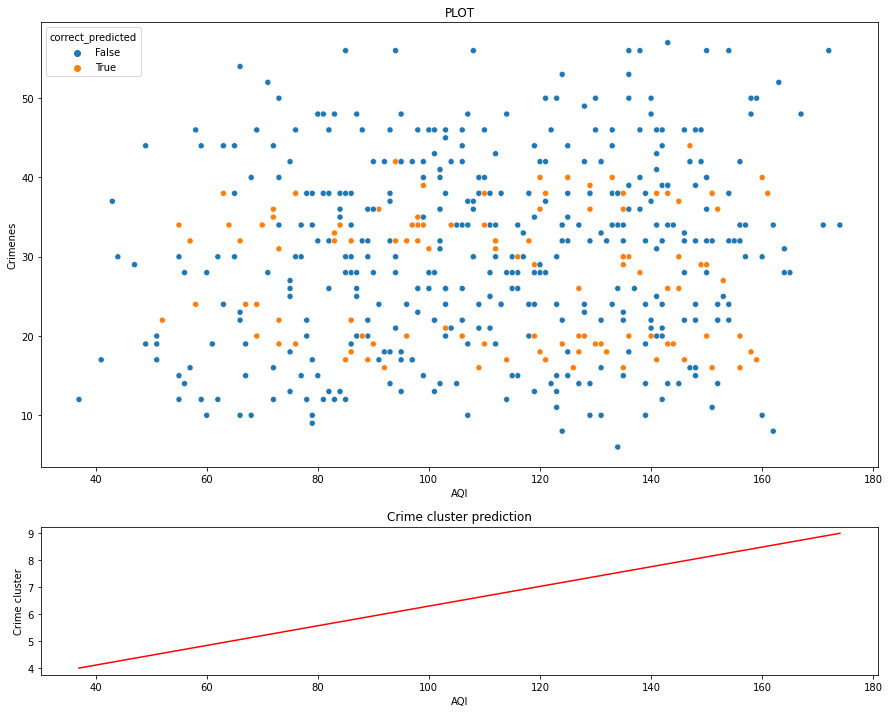

In [414]:
df_plot = df_Iztacalco.copy()

X_plot = df_plot.drop(df_plot.columns[[0, 1, 4, 5, 6, -1, -2, -3]], axis=1).values
y_plot = df_plot["Crime_cat_num"].values #target

y_pred = model.predict(X_plot)
y_pred_round = np.around(y_pred)
correct_predicted = y_pred_round == y_plot
accuracy = np.mean(correct_predicted)
df_plot['correct_predicted'] = correct_predicted
df_plot['predicted'] = y_pred_round

print(f"Accuracy: {accuracy * 100:.2f}%")



#fig, axes = plt.subplots(2, 1, figsize=(15, 16), sharey=True)
fig, axes = plt.subplots(2, 1, figsize=(15, 12), gridspec_kw={'height_ratios': [3, 1]})

sns.scatterplot(ax=axes[0], x="AQI", y="Crimenes", hue="correct_predicted", data=df_plot)
axes[0].set_title("PLOT")

x_cluster = [df_plot['AQI'].min(), df_plot['AQI'].max()]
y_cluster = [df_plot['predicted'].min(), df_plot['predicted'].max()]

#plt.plot(x, y)

axes[1].plot(x_cluster, y_cluster, 'r')

axes[1].set_ylabel("Crime cluster")
axes[1].set_xlabel("AQI")
axes[1].set_title("Crime cluster prediction")



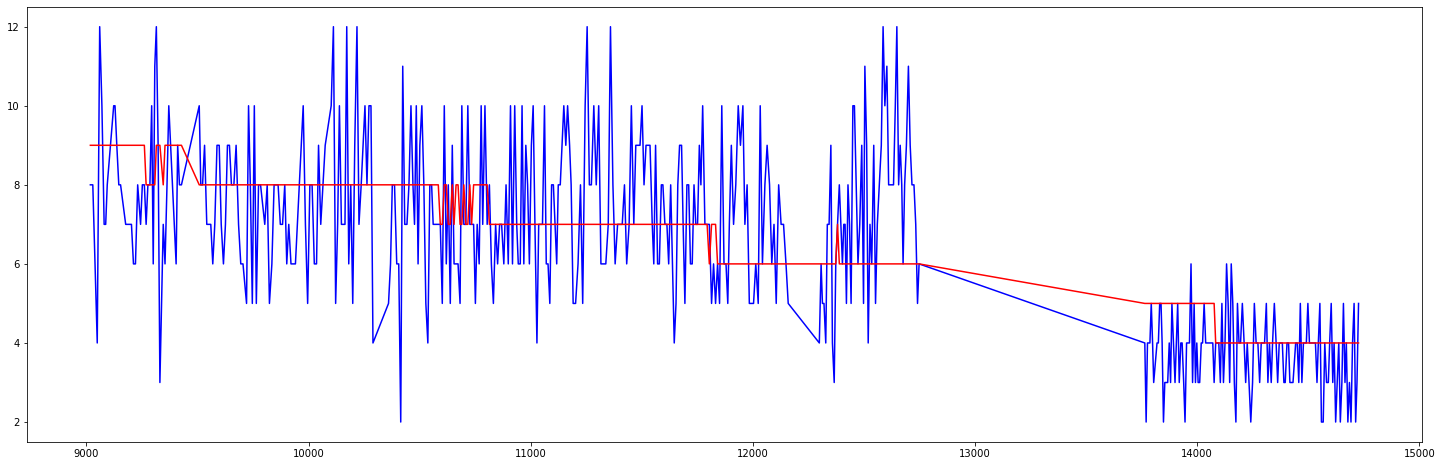

In [408]:
plt.figure(figsize=(25, 8))
plt.plot(df_plot["Crime_cat_num"], 'b')
plt.plot(df_plot['predicted'], 'r')
plt.show()

In [412]:
df_plot['predicted'].max()

9.0

# AQI cluster

In [415]:
categories = [i+1 for i in range(0, math.ceil(df_std_1["AQI"].max()+4), 5)]

labels = ["{0} - {1}".format(i, i+4) for i in range(1, math.ceil(df_std_1["AQI"].max()), 5)]
labels2 = list(range(1, len(labels)+1))
print(labels)
print(categories)
print(labels2)

['1 - 5', '6 - 10', '11 - 15', '16 - 20', '21 - 25', '26 - 30', '31 - 35', '36 - 40', '41 - 45', '46 - 50', '51 - 55', '56 - 60', '61 - 65', '66 - 70', '71 - 75', '76 - 80', '81 - 85', '86 - 90', '91 - 95', '96 - 100', '101 - 105', '106 - 110', '111 - 115', '116 - 120', '121 - 125', '126 - 130', '131 - 135', '136 - 140', '141 - 145', '146 - 150', '151 - 155', '156 - 160', '161 - 165', '166 - 170', '171 - 175']
[1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]


In [416]:
df_std_1 = df_std1[df_std1["Alcaldia"] == "GUSTAVO A MADERO"].copy()
df_std_1["AQI_cat"] = pd.cut(df_std_1['AQI'], bins=categories, right=False, labels=labels)
df_std_1["AQI_cat_num"] = pd.cut(df_std_1['AQI'], bins=categories, right=False, labels=labels2)

In [417]:
df_train, df_test = train_test_split(df_std_1, test_size=0.2)
X_train = df_train.drop(df_train.columns[[0, 1, 4, 5, 6, 8, -2, -3, -4, -5]], axis=1).values
y_train = df_train["Crime_cat_num"].values #target

In [418]:
X_train

array([[  12, 2020,   12,   30],
       [  11, 2020,   12,   15],
       [   9, 2020,   12,   19],
       ...,
       [  12, 2019,   12,   25],
       [   8, 2020,   12,   14],
       [   3, 2019,   12,   30]], dtype=int64)

In [419]:
X_test = df_test.drop(df_test.columns[[0, 1, 4, 5, 6, 8, -2, -3, -4, -5]], axis=1).values
y_test = df_test["Crime_cat_num"].values #target

In [420]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.3561018850553018

In [421]:
aqi_range = list(range(df_std_1["AQI"].values.min(), df_std_1["AQI"].values.max()+1, 1))
crime_pred = []
for a in aqi_range:
    crime_pred.append(get_alc_1_prediction([6, 2020, 12, a], model))

Accuracy: 22.96%


Text(0.5, 1.0, 'Crime cluster prediction')

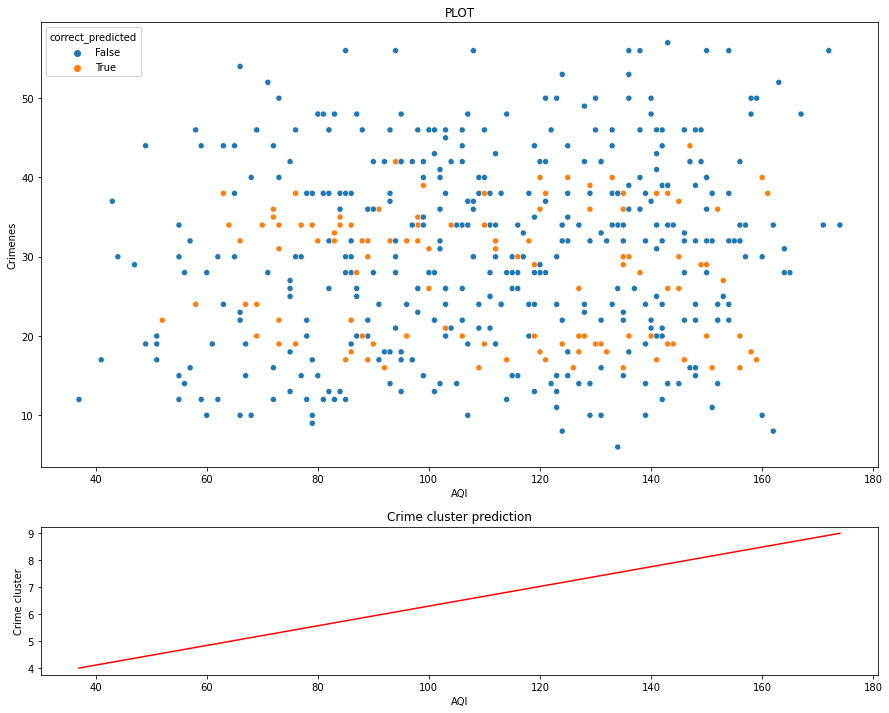

In [422]:
df_plot = df_std_1.copy()

X_plot = df_plot.drop(df_plot.columns[[0, 1, 4, 5, 6, 8, -2, -3, -4, -5]], axis=1).values
y_plot = df_plot["Crime_cat_num"].values #target

y_pred = model.predict(X_plot)
y_pred_round = np.around(y_pred)
correct_predicted = y_pred_round == y_plot
accuracy = np.mean(correct_predicted)
df_plot['correct_predicted'] = correct_predicted
df_plot['predicted'] = y_pred_round

print(f"Accuracy: {accuracy * 100:.2f}%")



#fig, axes = plt.subplots(2, 1, figsize=(15, 16), sharey=True)
fig, axes = plt.subplots(2, 1, figsize=(15, 12), gridspec_kw={'height_ratios': [3, 1]})

sns.scatterplot(ax=axes[0], x="AQI", y="Crimenes", hue="correct_predicted", data=df_plot)
axes[0].set_title("PLOT")


x_cluster = [df_plot['AQI'].min(), df_plot['AQI'].max()]
y_cluster = [df_plot['predicted'].min(), df_plot['predicted'].max()]

#plt.plot(x, y)

axes[1].plot(x_cluster, y_cluster, 'r')
axes[1].set_ylabel("Crime cluster")
axes[1].set_xlabel("AQI")
axes[1].set_title("Crime cluster prediction")

In [9]:
def get_alc_1_prediction(x, model):
    prediction = model.intercept_
    for i in range(len(model.coef_)):
        prediction = prediction + model.coef_[i]*x[i]
    return prediction

# Final Function

In [496]:
def Get_Plot_Alcaldia(Alcaldia):
            
    df_Alcaldia = df_std1[df_std1["Alcaldia"] == Alcaldia]

    df_train, df_test = train_test_split(df_Alcaldia, test_size=0.2)
    X_train = df_train.drop(df_train.columns[[0, 1, 4, 5, 6, 7, -1, -2, -3]], axis=1).values
    y_train = df_train["Crime_cat_num"].values #target
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    aqi_range = list(range(df_Alcaldia["AQI"].values.min(), df_Alcaldia["AQI"].values.max()+1, 1))
    crime_pred = []
    for a in aqi_range:
        crime_pred.append(get_alc_1_prediction([12, 2020, a], model))
        
    crime_pred2 = []
    for a in aqi_range:
        crime_pred2.append(get_alc_1_prediction([12, 2021, a], model))
    
    crime_pred3 = []
    for a in aqi_range:
        crime_pred3.append(get_alc_1_prediction([12, 2022, a], model))
        
    df_plot = df_Alcaldia.copy()

    X_plot = df_plot.drop(df_plot.columns[[0, 1, 4, 5, 6, 7, -1, -2, -3]], axis=1).values
    y_plot = df_plot["Crime_cat_num"].values #target

    y_pred = model.predict(X_plot)
    y_pred_round = np.around(y_pred)
    correct_predicted = y_pred_round == y_plot
    accuracy = np.mean(correct_predicted)
    df_plot['correct_predicted'] = correct_predicted
    df_plot['predicted'] = y_pred_round
    
    accuracy = round(accuracy*100, 2)
    #print(f"Accuracy: {accuracy}%")
    
    fig, axes = plt.subplots(2, 1, figsize=(15, 15), gridspec_kw={'height_ratios': [3, 1]})

    sns.scatterplot(ax=axes[0], x="AQI", y="Crimenes", hue="correct_predicted", data=df_plot)
    
    #print(f"f(x_1,x_2,x_3,x_4,x_5 ) = {model.intercept_} + {model.coef_[0]} x_1 + {model.coef_[1]} x_2 + { model.coef_[2]} x_3 + { model.coef_[3]} x_4 + {model.coef_[4]} x_5")
    
    axes[0].set_title(r'$f(x_1, x_2, x_3) = $' f' {round(model.intercept_, 10)} + {round(model.coef_[0], 10)} ' r'$ x_1 + $' f'{round(model.coef_[1], 10)} '  r'$ x_2 + $' f'{round(model.coef_[2], 10)} '  r'$ x_3 $' f'\n\n{Alcaldia} accuracy: {accuracy}%', fontsize = 15)
    
    #axes[0].suptitle(f'{Alcaldia} accuracy: {accuracy}%', fontsize = 15)

    
    #print(f"{Alcaldia} : size: {len(crime_pred)} max: {crime_pred[-1]} ")
    axes[1].plot(aqi_range, crime_pred, 'purple', label="2020")
    axes[1].set_ylabel("Crime cluster")
    axes[1].set_xlabel("AQI")
    #axes[1].set_title("Crime cluster prediction for November 2020")
    
    axes[1].plot(aqi_range, crime_pred2, 'b', label="2021")
    axes[1].set_ylabel("Crime cluster")
    axes[1].set_xlabel("AQI")
    
    axes[1].plot(aqi_range, crime_pred3, 'r', label="2022")
    
    
    
    
    axes[1].legend()
    axes[1].set_title("Crime cluster prediction for December 2020-2022", fontsize = 15)


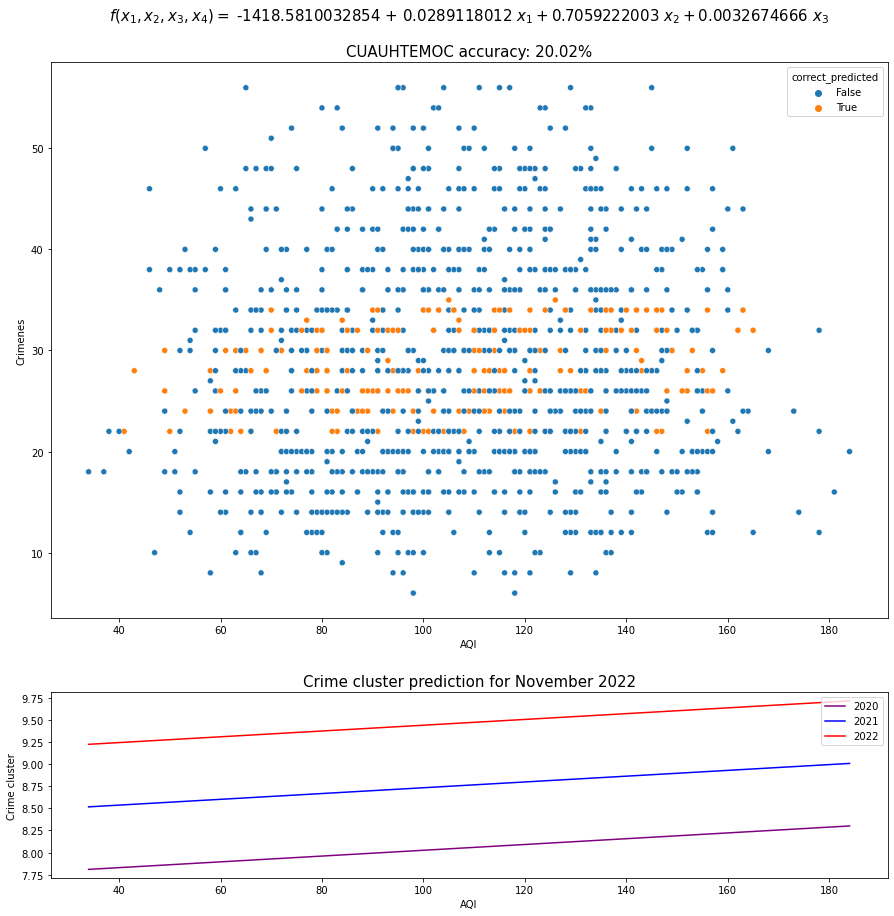

In [490]:
Get_Plot_Alcaldia("CUAUHTEMOC")

In [271]:
df_std1["Alcaldia"].unique()

array(['BENITO JUAREZ', 'CUAJIMALPA DE MORELOS', 'CUAUHTEMOC',
       'IZTACALCO', 'MIGUEL HIDALGO', 'TLAHUAC', 'TLALPAN',
       'VENUSTIANO CARRANZA', 'AZCAPOTZALCO', 'IZTAPALAPA', 'MILPA ALTA',
       'GUSTAVO A MADERO', 'ALVARO OBREGON'], dtype=object)

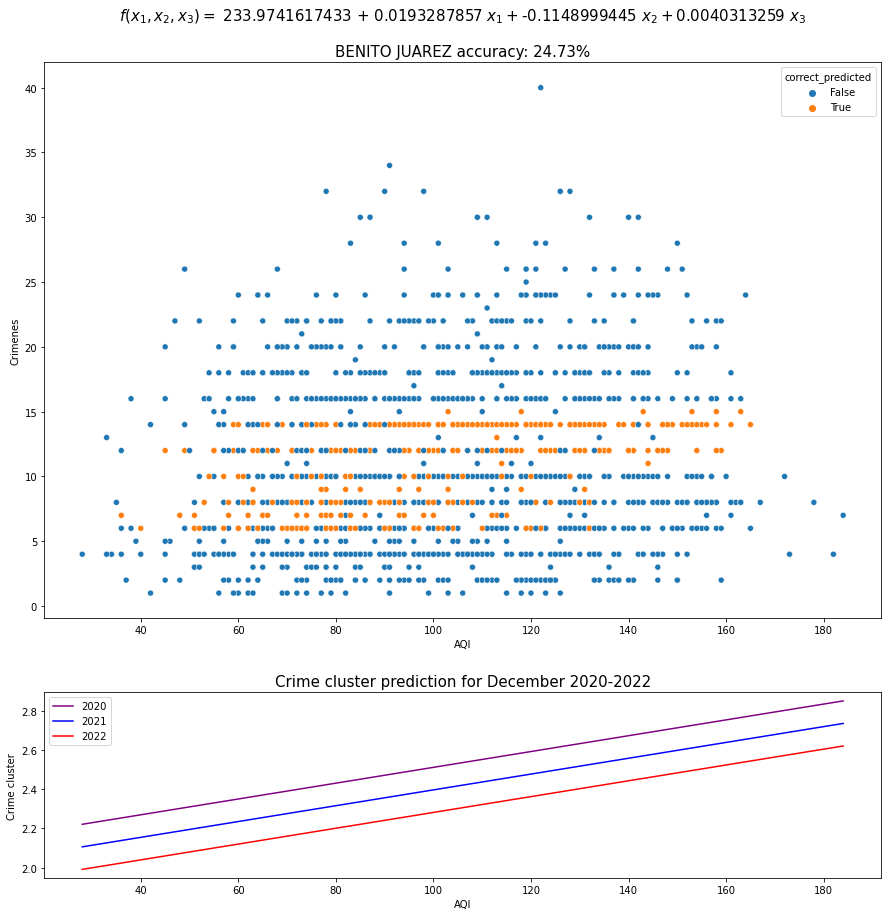

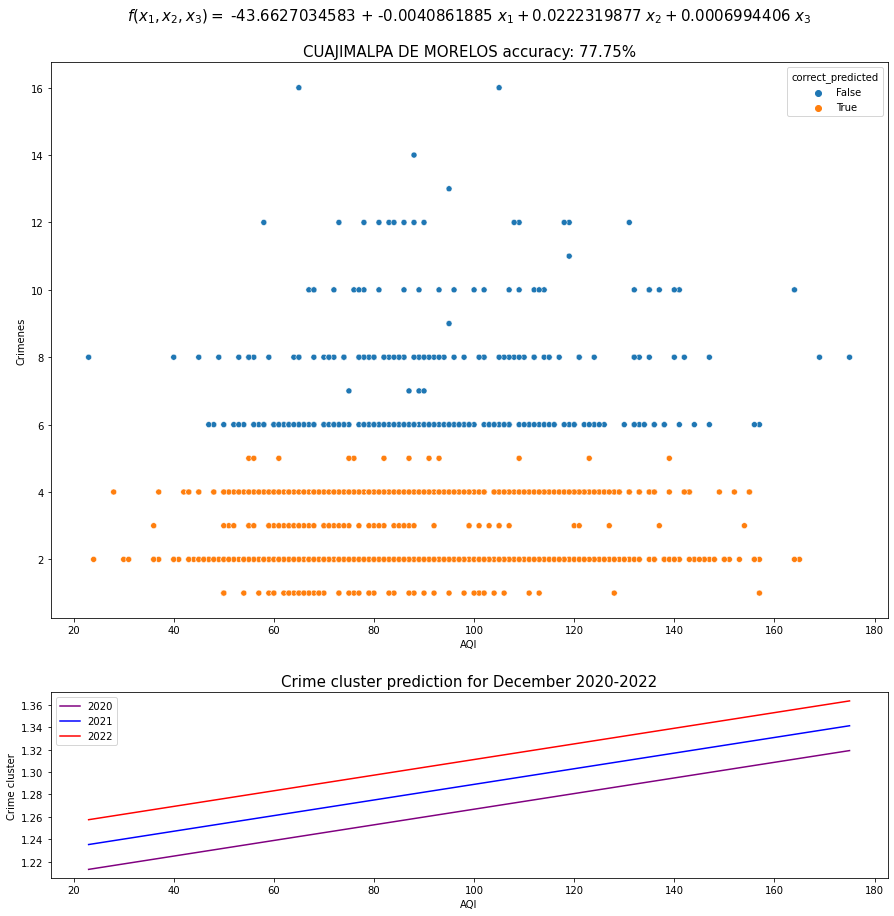

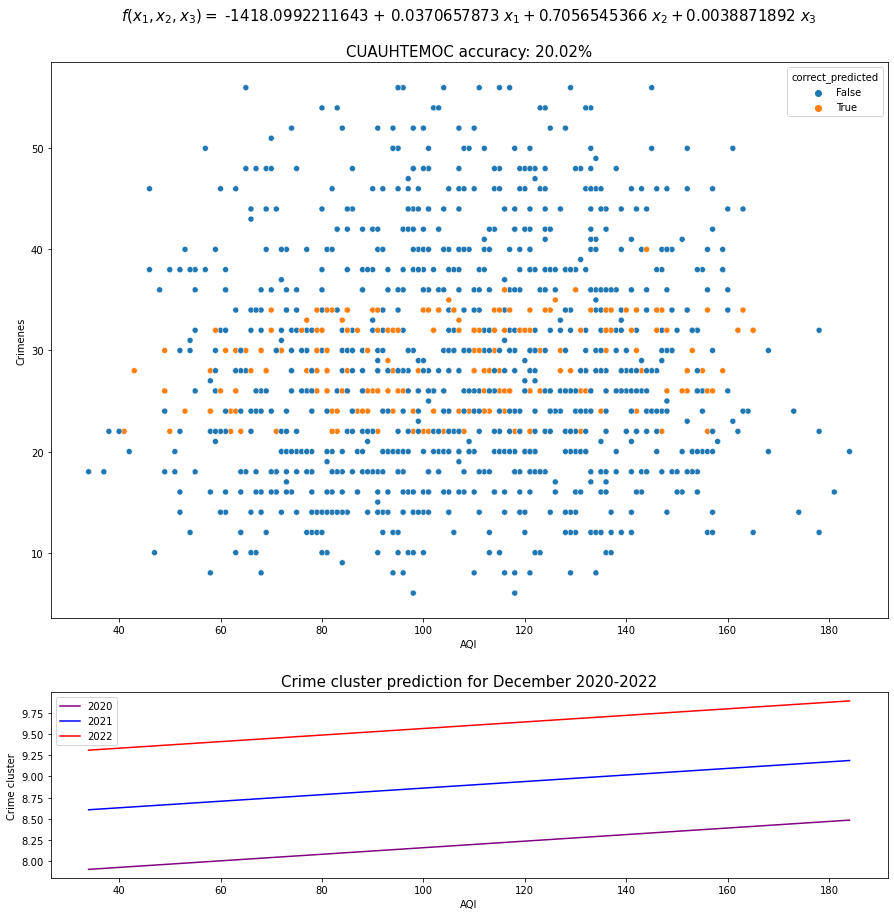

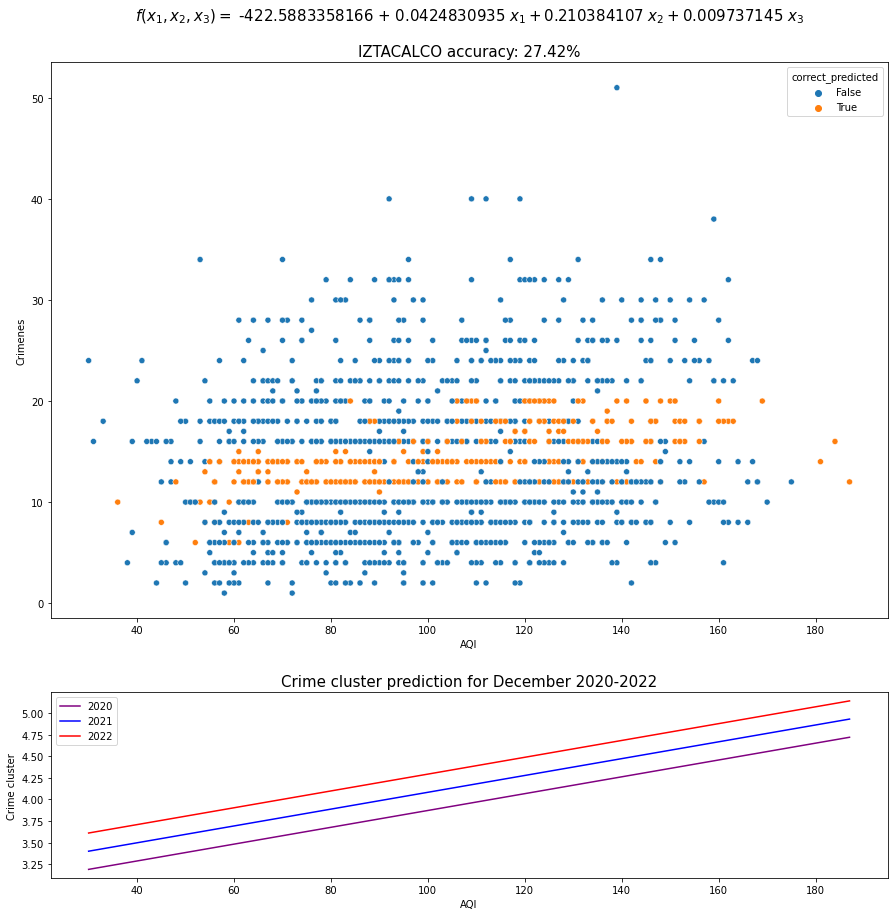

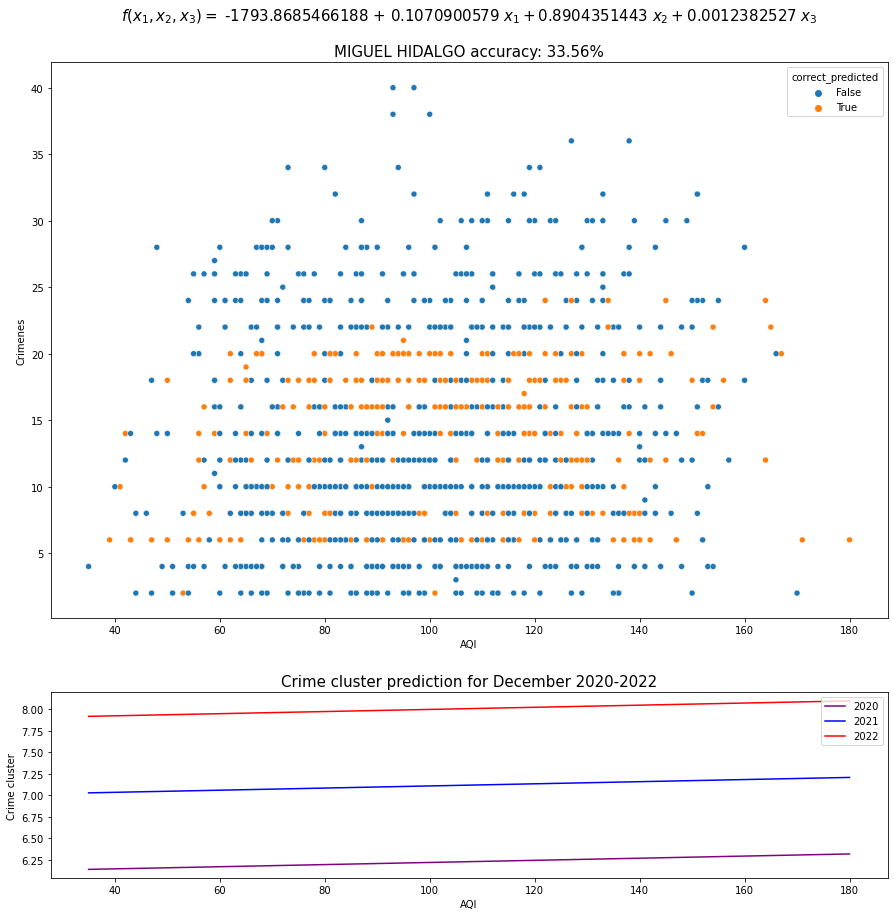

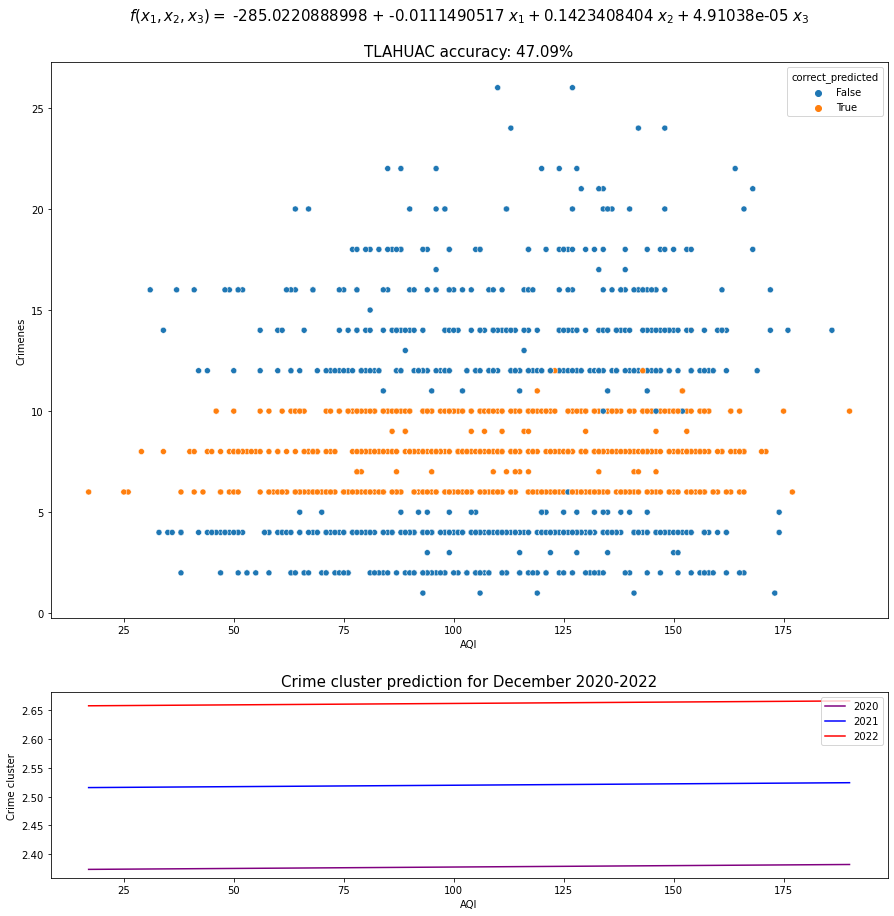

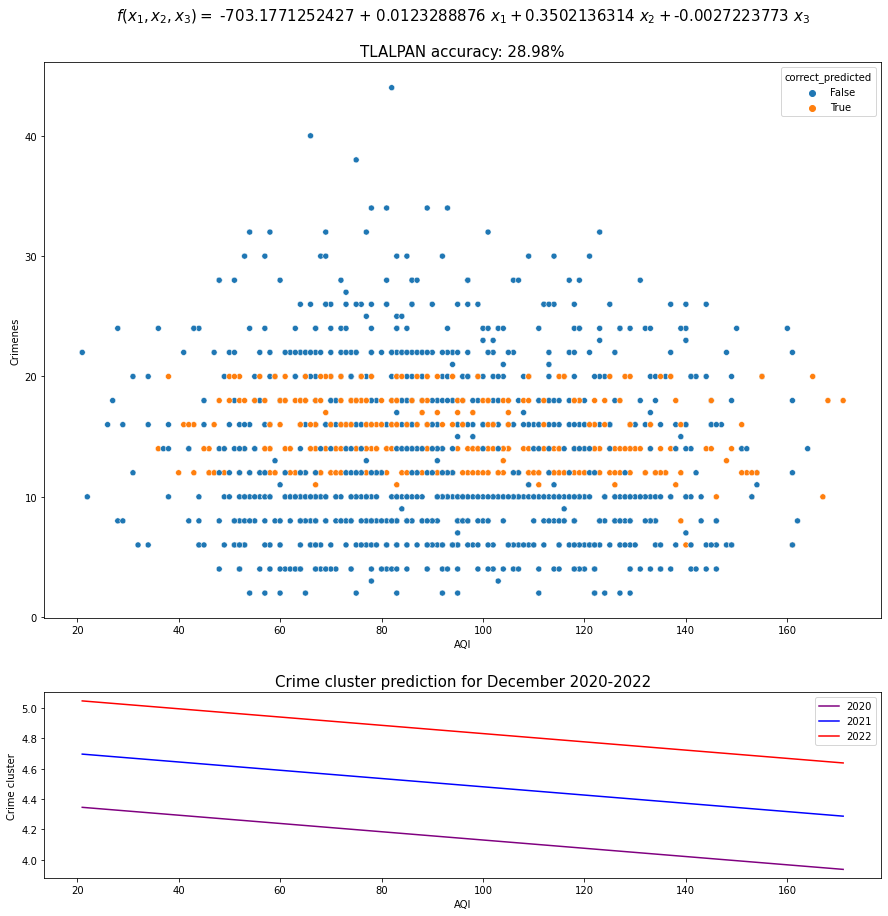

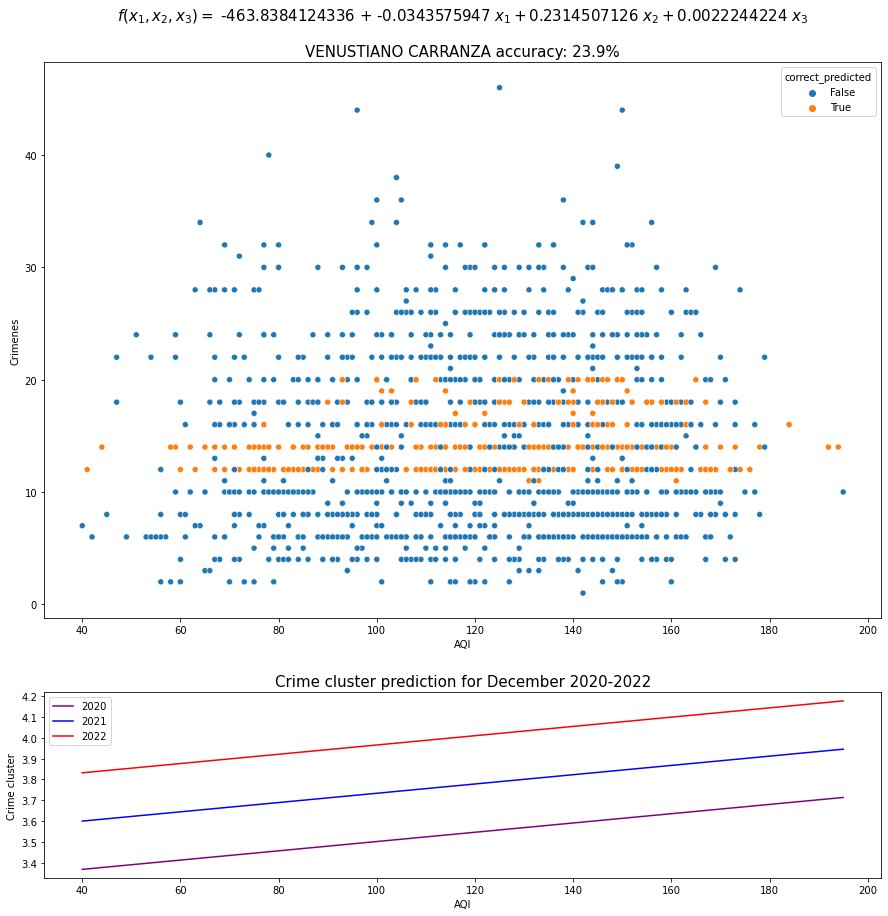

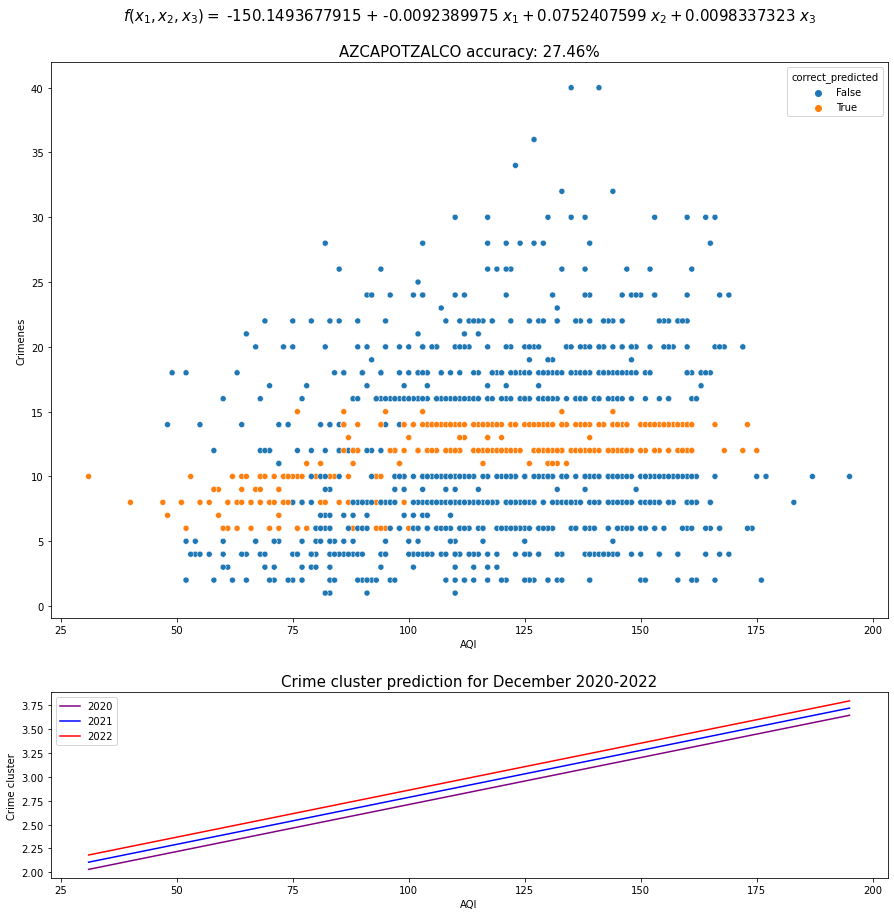

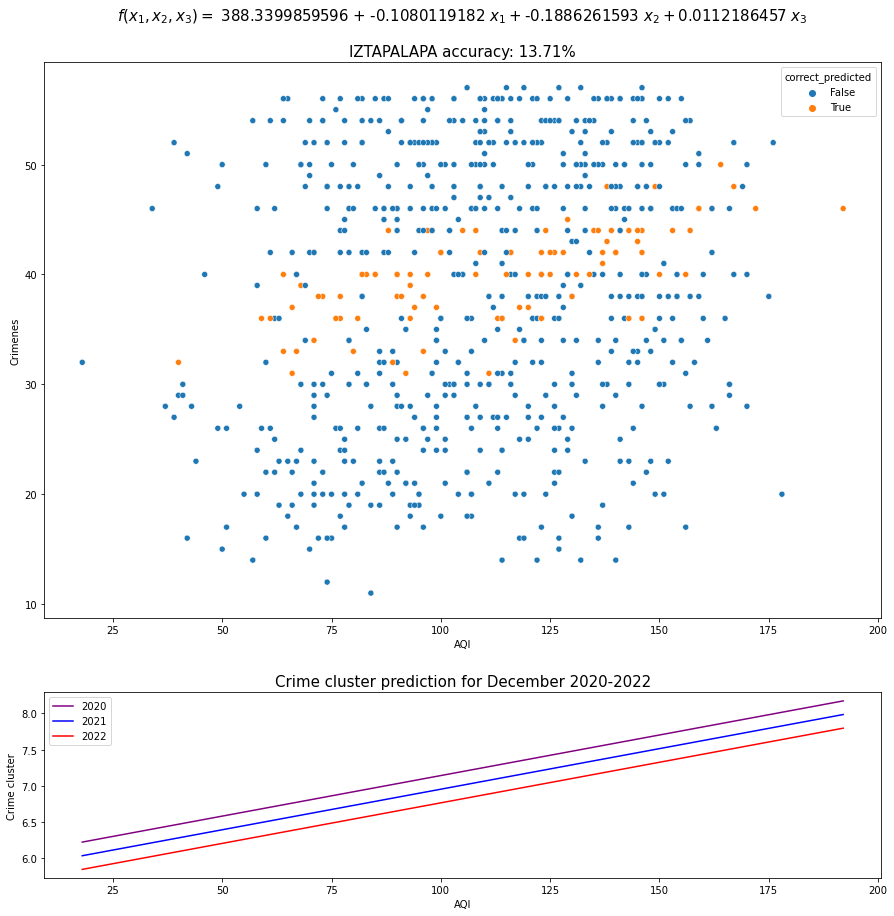

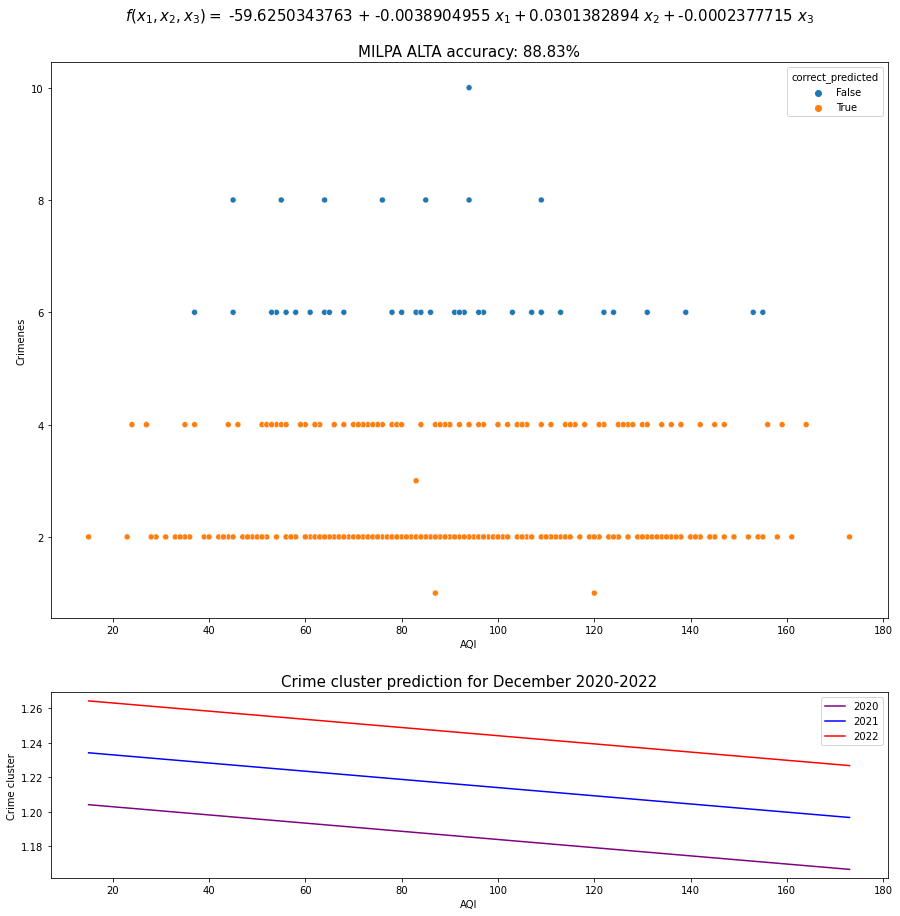

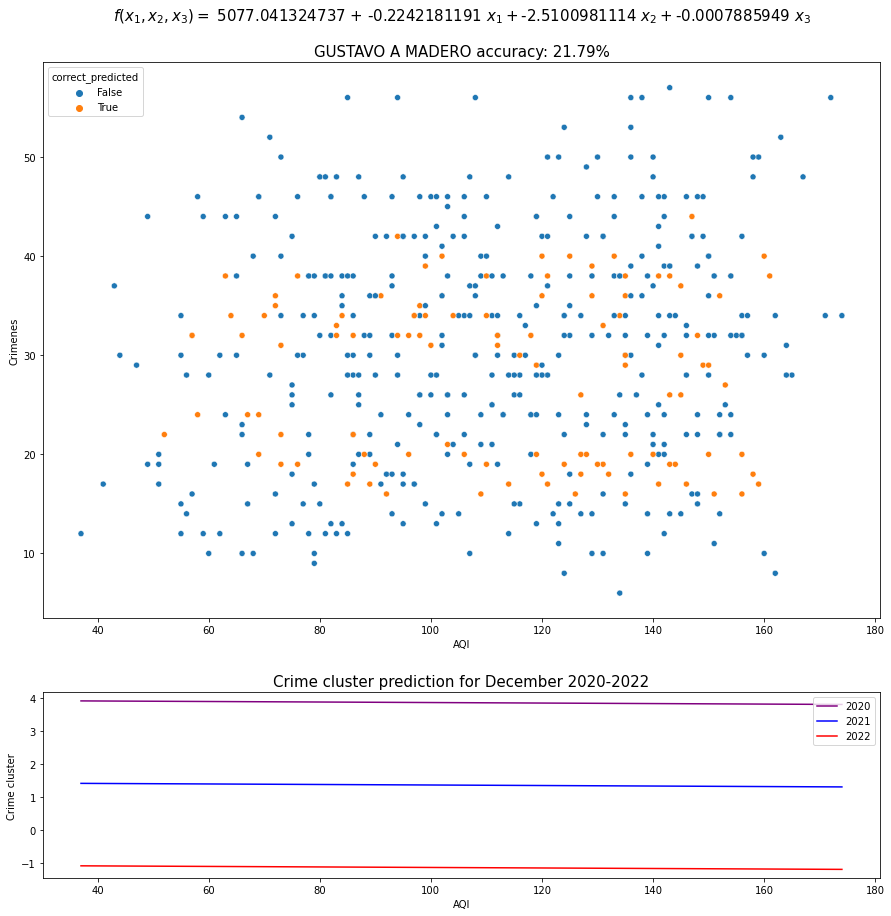

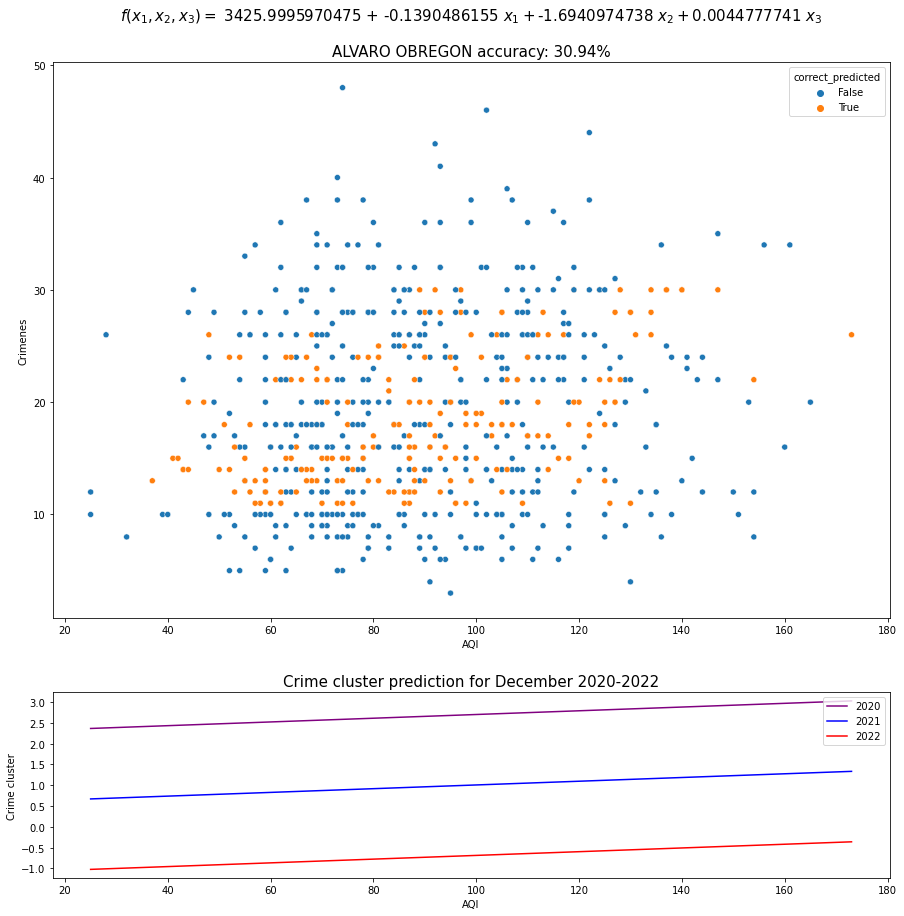

In [497]:

for alcaldia in df_std1["Alcaldia"].unique():
    Get_Plot_Alcaldia(alcaldia)


In [52]:
def Get_Alcaldia_Anio(Alcaldia):
            
    df_Alcaldia = df_std1[df_std1["Alcaldia"] == Alcaldia]

    df_train, df_test = train_test_split(df_Alcaldia, test_size=0.2)
    X_train = df_train.drop(df_train.columns[[0, 4, 5, 6, 7, -1, -2, -3]], axis=1).values
    y_train = df_train["Crime_cat_num"].values #target
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    alc_num = df_Alcaldia["Alcaldia_num"].unique()[0]
    
    """
    aqi_range = list(range(df_Alcaldia["AQI"].values.min(), df_Alcaldia["AQI"].values.max()+1, 1))
    crime_pred = []
    for a in aqi_range:
        crime_pred.append(get_alc_1_prediction([dia, mes, anio, a], model))
        
    crime_pred2 = []
    for a in aqi_range:
        crime_pred2.append(get_alc_1_prediction([2021, a], model))
    
    crime_pred3 = []
    for a in aqi_range:
        crime_pred3.append(get_alc_1_prediction([2022, a], model))
    """
        

    df_plot = df_Alcaldia.copy()

    X_plot = df_plot.drop(df_plot.columns[[0, 4, 5, 6, 7, -1, -2, -3]], axis=1).values
    y_plot = df_plot["Crime_cat_num"].values #target

    y_pred = model.predict(X_plot)
    y_pred_round = np.around(y_pred)
    correct_predicted = y_pred_round == y_plot
    accuracy = np.mean(correct_predicted)

    
    accuracy = round(accuracy*100, 2)
    
    print(f' "{Alcaldia}": [{alc_num}, {round(model.intercept_, 10)}, {round(model.coef_[0], 10)}, {round(model.coef_[1], 10)}, {round(model.coef_[2], 10)}, {round(model.coef_[3], 10)}, {accuracy}],')
    
    

    """
    fig, axes = plt.subplots(2, 1, figsize=(15, 15), gridspec_kw={'height_ratios': [3, 1]})

    sns.scatterplot(ax=axes[0], x="AQI", y="Crimenes", hue="correct_predicted", data=df_plot)
    

    
    axes[0].set_title(r'$f(x_1, x_2) = $' f' {round(model.intercept_, 10)} + {round(model.coef_[0], 10)} ' r'$ x_1 + $' f'{round(model.coef_[1], 10)} '  r'$ x_2 $' f'\n\n{Alcaldia} accuracy: {accuracy}%', fontsize = 15)
    
    

    axes[1].plot(aqi_range, crime_pred, 'purple', label="2020")
    axes[1].set_ylabel("Crime cluster")
    axes[1].set_xlabel("AQI")

    axes[1].plot(aqi_range, crime_pred2, 'b', label="2021")
    axes[1].set_ylabel("Crime cluster")
    axes[1].set_xlabel("AQI")
    
    axes[1].plot(aqi_range, crime_pred3, 'r', label="2022")
    
    axes[1].legend()
    axes[1].set_title("Crime cluster prediction for 2020-2022", fontsize = 15)
    
    fig.savefig(f'../PNG/{Alcaldia}_plot.png', bbox_inches='tight')
    """

In [53]:
for alcaldia in df_std1["Alcaldia"].unique():
    Get_Alcaldia_Anio(alcaldia)

 "BENITO JUAREZ": [1, 214.9126391708, -0.0018374312, 0.0302102129, -0.1055739376, 0.0058998541, 24.6],
 "CUAJIMALPA DE MORELOS": [5, -40.077475915, -0.0020568653, -0.0054645416, 0.0204733694, 0.0007117387, 77.75],
 "CUAUHTEMOC": [8, -1429.8475079076, -0.0158129401, 0.029503595, 0.7116424221, 0.0032419824, 20.17],
 "IZTACALCO": [3, -449.6763203576, 0.0038919214, 0.0508705173, 0.2237442662, 0.0101261185, 27.55],
 "MIGUEL HIDALGO": [9, -1781.1780802088, 0.0027193564, 0.1020666467, 0.8840865336, 0.0021126176, 34.07],
 "TLAHUAC": [6, -267.7351537166, -0.0019352763, -0.0148895216, 0.1337588241, 0.000818561, 47.4],
 "TLALPAN": [4, -737.6545789514, 0.0059929009, 0.0060511696, 0.3673142828, -0.0034980614, 29.05],
 "VENUSTIANO CARRANZA": [2, -393.2098159588, -0.0052166789, -0.0281358348, 0.1964024774, 0.0030982005, 24.55],
 "AZCAPOTZALCO": [7, -159.1142355563, -0.0040754038, -0.0003299716, 0.0796972529, 0.0093918495, 27.84],
 "IZTAPALAPA": [10, 456.3869000885, 0.0044874625, -0.0774887946, -0.222

In [56]:
 models = {
     "BENITO JUAREZ": [1, 214.9126391708, -0.0018374312, 0.0302102129, -0.1055739376, 0.0058998541, 24.6],
     "CUAJIMALPA DE MORELOS": [5, -40.077475915, -0.0020568653, -0.0054645416, 0.0204733694, 0.0007117387, 77.75],
     "CUAUHTEMOC": [8, -1429.8475079076, -0.0158129401, 0.029503595, 0.7116424221, 0.0032419824, 20.17],
     "IZTACALCO": [3, -449.6763203576, 0.0038919214, 0.0508705173, 0.2237442662, 0.0101261185, 27.55],
     "MIGUEL HIDALGO": [9, -1781.1780802088, 0.0027193564, 0.1020666467, 0.8840865336, 0.0021126176, 34.07],
     "TLAHUAC": [6, -267.7351537166, -0.0019352763, -0.0148895216, 0.1337588241, 0.000818561, 47.4],
     "TLALPAN": [4, -737.6545789514, 0.0059929009, 0.0060511696, 0.3673142828, -0.0034980614, 29.05],
     "VENUSTIANO CARRANZA": [2, -393.2098159588, -0.0052166789, -0.0281358348, 0.1964024774, 0.0030982005, 24.55],
     "AZCAPOTZALCO": [7, -159.1142355563, -0.0040754038, -0.0003299716, 0.0796972529, 0.0093918495, 27.84],
     "IZTAPALAPA": [10, 456.3869000885, 0.0044874625, -0.0774887946, -0.2225607627, 0.0122347371, 13.31],
     "MILPA ALTA": [13, -80.3076370813, -0.0003960816, -0.0046275519, 0.0404109748, -0.0003385311, 88.83],
     "GUSTAVO A MADERO": [12, 4951.1519849232, -0.0192311166, -0.2230044121, -2.4476907629, 0.0002629555, 24.51],
     "ALVARO OBREGON": [11, 3388.9302909273, -0.0183477195, -0.1446136909, -1.6755320747, 0.00319275, 29.91],

    }


In [24]:
models["BENITO JUAREZ"][3]

23.31

In [86]:
crime_mapper = {1:[1, 5], 2:[6, 10], 3:[11, 15], 4:[16, 20], 5:[21, 25], 6:[26, 30], 7:[31, 35], 8:[36, 40], 9:[41, 45], 10:[46, 50], 11:[51, 55], 12:[56, 60]}

In [111]:
def get_prediction(dia, mes, anio, aqi, alcaldia):
    time = [dia, mes, anio, aqi]
    prediction = models[alcaldia][1]
    for i in range(len(models[alcaldia])-3):
        prediction = prediction + models[alcaldia][i+2]*time[i]

    round_prediction = round(((math.modf(prediction)[0])*5%100) + crime_mapper[math.floor(prediction)][0])
    
    return f'{round_prediction} crímenes, el modelo tiene una precisión de {models[alcaldia][-1]}%'

In [112]:
get_prediction(2, 12, 2021, 80, "BENITO JUAREZ")

'8 crímenes, el modelo tiene una precisión de 24.6%'

In [51]:
df_std1[df_std1["Alcaldia"] == "IZTAPALAPA"]["Alcaldia_num"].unique()[0]

10

In [110]:
df_std1[df_std1["Alcaldia"] == "IZTAPALAPA"]

ID  Dia  Mes  Anio    Latitud   Longitud    Alcaldia  \
30       4_1_2016_IZTAP    4    1  2016  19.360794 -99.073883  IZTAPALAPA   
39       5_1_2016_IZTAP    5    1  2016  19.360794 -99.073883  IZTAPALAPA   
49       6_1_2016_IZTAP    6    1  2016  19.360794 -99.073883  IZTAPALAPA   
57       7_1_2016_IZTAP    7    1  2016  19.360794 -99.073883  IZTAPALAPA   
65       8_1_2016_IZTAP    8    1  2016  19.360794 -99.073883  IZTAPALAPA   
...                 ...  ...  ...   ...        ...        ...         ...   
14700  27_12_2020_IZTAP   27   12  2020  19.360794 -99.073883  IZTAPALAPA   
14707  28_12_2020_IZTAP   28   12  2020  19.360794 -99.073883  IZTAPALAPA   
14714  29_12_2020_IZTAP   29   12  2020  19.360794 -99.073883  IZTAPALAPA   
14720  30_12_2020_IZTAP   30   12  2020  19.360794 -99.073883  IZTAPALAPA   
14727  31_12_2020_IZTAP   31   12  2020  19.360794 -99.073883  IZTAPALAPA   

       Alcaldia_num  AQI  Crimenes Crime_cat Crime_cat_num  
30               10   82        38   36 - 40             8  
39               10  111        30   26 - 30             6  
49               10   86        32   31 - 35             7  
57               10   79        34   31 - 35             7  
65               10   99        34   31 - 35             7  
...             ...  ...       ...       ...           ...  
14700            10  117        20   16 - 20             4  
14707            10  133        23   21 - 25             5  
14714            10  156        31   31 - 35             7  
14720            10  137        19   16 - 20             4  
14727            10  127        15   11 - 15             3  

[744 rows x 12 columns]

In [113]:
df_std1.rename(columns={"Crimenes": "Crimes"})

ID  Dia  Mes  Anio    Latitud   Longitud  \
0        1_1_2016_BENIT    1    1  2016  19.370464 -99.159599   
1        1_1_2016_CUAJI    1    1  2016  19.365313 -99.291702   
2        1_1_2016_CUAUH    1    1  2016  19.411617 -99.152206   
3        1_1_2016_IZTAC    1    1  2016  19.384413 -99.117638   
4        1_1_2016_MIGUE    1    1  2016  19.404051 -99.202660   
...                 ...  ...  ...   ...        ...        ...   
14724  31_12_2020_BENIT   31   12  2020  19.370464 -99.159599   
14725  31_12_2020_CUAJI   31   12  2020  19.357357 -99.262863   
14726  31_12_2020_GUSTA   31   12  2020  19.482700 -99.094521   
14727  31_12_2020_IZTAP   31   12  2020  19.360794 -99.073883   
14728  31_12_2020_VENUS   31   12  2020  19.424610 -99.119591   

                    Alcaldia  Alcaldia_num  AQI  Crimes Crime_cat  \
0              BENITO JUAREZ             1  184       7    6 - 10   
1      CUAJIMALPA DE MORELOS             5  164      10    6 - 10   
2                 CUAUHTEMOC             8  178      12   11 - 15   
3                  IZTACALCO             3  187      12   11 - 15   
4             MIGUEL HIDALGO             9  180       6    6 - 10   
...                      ...           ...  ...     ...       ...   
14724          BENITO JUAREZ             1  117       2     1 - 5   
14725  CUAJIMALPA DE MORELOS             5   97       2     1 - 5   
14726       GUSTAVO A MADERO            12  128      24   21 - 25   
14727             IZTAPALAPA            10  127      15   11 - 15   
14728    VENUSTIANO CARRANZA             2  127      14   11 - 15   

      Crime_cat_num  
0                 2  
1                 2  
2                 3  
3                 3  
4                 2  
...             ...  
14724             1  
14725             1  
14726             5  
14727             3  
14728             3  

[14729 rows x 12 columns]

In [114]:
df_std1

ID  Dia  Mes  Anio    Latitud   Longitud  \
0        1_1_2016_BENIT    1    1  2016  19.370464 -99.159599   
1        1_1_2016_CUAJI    1    1  2016  19.365313 -99.291702   
2        1_1_2016_CUAUH    1    1  2016  19.411617 -99.152206   
3        1_1_2016_IZTAC    1    1  2016  19.384413 -99.117638   
4        1_1_2016_MIGUE    1    1  2016  19.404051 -99.202660   
...                 ...  ...  ...   ...        ...        ...   
14724  31_12_2020_BENIT   31   12  2020  19.370464 -99.159599   
14725  31_12_2020_CUAJI   31   12  2020  19.357357 -99.262863   
14726  31_12_2020_GUSTA   31   12  2020  19.482700 -99.094521   
14727  31_12_2020_IZTAP   31   12  2020  19.360794 -99.073883   
14728  31_12_2020_VENUS   31   12  2020  19.424610 -99.119591   

                    Alcaldia  Alcaldia_num  AQI  Crimenes Crime_cat  \
0              BENITO JUAREZ             1  184         7    6 - 10   
1      CUAJIMALPA DE MORELOS             5  164        10    6 - 10   
2                 CUAUHTEMOC             8  178        12   11 - 15   
3                  IZTACALCO             3  187        12   11 - 15   
4             MIGUEL HIDALGO             9  180         6    6 - 10   
...                      ...           ...  ...       ...       ...   
14724          BENITO JUAREZ             1  117         2     1 - 5   
14725  CUAJIMALPA DE MORELOS             5   97         2     1 - 5   
14726       GUSTAVO A MADERO            12  128        24   21 - 25   
14727             IZTAPALAPA            10  127        15   11 - 15   
14728    VENUSTIANO CARRANZA             2  127        14   11 - 15   

      Crime_cat_num  
0                 2  
1                 2  
2                 3  
3                 3  
4                 2  
...             ...  
14724             1  
14725             1  
14726             5  
14727             3  
14728             3  

[14729 rows x 12 columns]